The purpose of this excercise is to become familair with plotting RNA sequencing samples and generating a Matplotlib histogram with them.

In [10]:
import numpy as np
import csv

data = []
first_line = True

with open('E-MTAB-5214-query-results.tpms.tsv') as fid:
    csvfile = csv.reader(fid, delimiter= '\t')
    for line in csvfile:
        if first_line:
            names = line
            first_line = False
        else:
            data.append(line)
data = np.array(data)

In [11]:
names

['Gene ID',
 'Gene Name',
 'Brodmann (1909) area 24',
 'Brodmann (1909) area 9',
 'C1 segment of cervical spinal cord',
 'EBV-transformed lymphocyte',
 'adrenal gland',
 'amygdala',
 'aorta',
 'atrium auricular region',
 'blood',
 'breast',
 'caudate nucleus',
 'cerebellar hemisphere',
 'cerebellum',
 'cerebral cortex',
 'coronary artery',
 'cortex of kidney',
 'ectocervix',
 'endocervix',
 'esophagogastric junction',
 'esophagus mucosa',
 'esophagus muscularis mucosa',
 'fallopian tube',
 'greater omentum',
 'heart left ventricle',
 'hippocampus proper',
 'hypothalamus',
 'liver',
 'lower leg skin',
 'lung',
 'minor salivary gland',
 'nucleus accumbens',
 'ovary',
 'pancreas',
 'pituitary gland',
 'prostate gland',
 'putamen',
 'sigmoid colon',
 'skeletal muscle tissue',
 "small intestine Peyer's patch",
 'spleen',
 'stomach',
 'subcutaneous adipose tissue',
 'substantia nigra',
 'suprapubic skin',
 'testis',
 'thyroid gland',
 'tibial artery',
 'tibial nerve',
 'transformed skin fibr

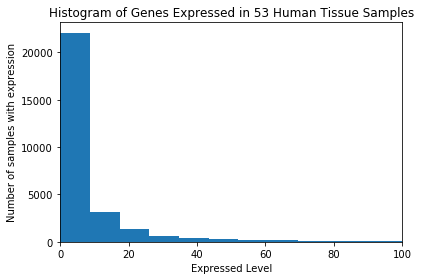

In [6]:
import matplotlib.mlab as mlab
import matplotlib.pyplot as plt


num_bins = 10000

fig, ax = plt.subplots()
ax.set_xlim (0,100) 

# the histogram of the data
n, bins, patches = ax.hist([float(x) for x in data[:,2] if x], num_bins)

ax.set_ylabel('Number of samples with expression')
ax.set_xlabel('Expressed Level')
ax.set_title('Histogram of Genes Expressed in 53 Human Tissue Samples')

# Tweak spacing to prevent clipping of ylabel
fig.tight_layout()
plt.show()



The graph above is similar to the graph shown on the Expression Atlas website. However, we reduced the number of bins because our original graph was too condensed in one area. 

In [8]:
data [0]

array(['ENSG00000000003', 'TSPAN6', '6.0', '5.0', '7.0', '0.3', '17.0',
       '7.0', '11.0', '5.0', '0.2', '36.0', '7.0', '2.0', '3.0', '5.0',
       '11.0', '15.0', '39.0', '47.0', '10.0', '37.0', '8.0', '30.0',
       '28.0', '2.0', '6.0', '9.0', '24.0', '11.0', '14.0', '32.0', '7.0',
       '81.0', '9.0', '51.0', '22.0', '4.0', '11.0', '2.0', '18.0', '10.0',
       '13.0', '33.0', '6.0', '10.0', '70.0', '22.0', '9.0', '35.0',
       '20.0', '38.0', '16.0', '33.0', '31.0'], 
      dtype='|S25')

In [11]:
data[:,2]

array(['6.0', '0.2', '26.0', ..., '1.0', '0.1', '0.8'], 
      dtype='|S25')

In [14]:
np.max ([float(x) for x in data[:,2] if x])

86609.0

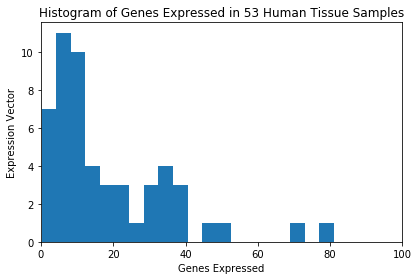

In [13]:
num_bins = 20

fig, ax = plt.subplots()
ax.set_xlim (0,100) 

# the histogram of the data
n, bins, patches = ax.hist([float(x) for x in data[0][2:] if x], num_bins)

ax.set_ylabel('Number of samples with expression')
ax.set_xlabel('Expressed Level')
ax.set_title('Histogram of Genes Expressed in 53 Human Tissue Samples')

# Tweak spacing to prevent clipping of ylabel
fig.tight_layout()
plt.show()

In [29]:
np.max ([float(x) for x in data[0][2:] if x])

81.0

Attemping a PCA with the same data

In [65]:
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

X = []

for line in data[:,2:]:
    row = []
    for x in line:
        if x and  x!= '0.2s':
            row.append(float(x))
        else:
            row.append(0.0)
    X.append(row)

X = np.array(X)
kmeans = KMeans(n_clusters=4, random_state=0).fit(X)
L = kmeans.labels_
centroids = kmeans.cluster_centers_

pca = PCA(n_components=2)
X_r = pca.fit(X).transform(X)



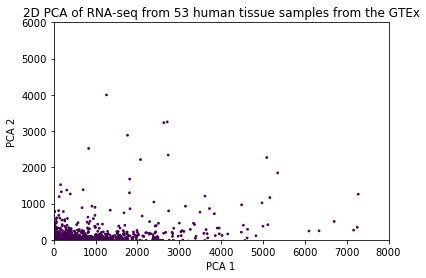

In [68]:
fig.tight_layout()
plt.scatter(X_r[:,0], X_r[:,1], 3, L)
plt.axis((0, 8000, 0, 6000))
plt.title("2D PCA of RNA-seq from 53 human tissue samples from the GTEx")
plt.xlabel("PCA 1")
plt.ylabel("PCA 2")
plt.show()


Scatter plot of the first two principal components of the data with 4 Kmeans clusters of varying colors

In [70]:

x=3
y=x*x
print(y)

9


In [75]:
def square(x):
    y=x*x
    print(y)
    return y 


In [76]:
y=square(3)

9


In [77]:
z=square(3)

9


In [78]:
print(z)

9


In [79]:
X=[1,2,3]

In [80]:
print(X)

[1, 2, 3]


In [81]:
X[0]

1

In [82]:
X[2]

3

In [83]:
def value(inputarray):
    return inputarray[2]
    

In [84]:
X[2]

3

In [85]:
w=value(X)

In [86]:
print(w)

3


In [87]:
def morevalue(inputarray,position):
    return inputarray[position]
    

In [88]:
morevalue(X,2)

3

In [89]:
for i in X:
    print(i)

1
2
3


In [95]:
newarray=[]
for row in X_r:
    print(row)
    if row[0]<10000 and row[1]<10000:
        newarray.append(row)

[-31.88190045 -18.80738003]
[-123.71695442  -18.11277513]
[ 183.13315064   -7.19670808]
[-98.66318352 -15.34757986]
[-120.25126854  -17.33138096]
[ -24.74390104  603.80486611]
[ 117.78141747  -20.13080855]
[ 38.89580309  -9.57928361]
[-54.82491771 -16.82927395]
[-22.58307123  -4.21694949]
[-110.57588039  -17.96494628]
[-24.82270615 -17.90956793]
[ 59.96848813 -14.75718956]
[-28.5404739  -17.42146338]
[ -9.71864645 -17.42066746]
[-119.0239257   -18.30839281]
[-15.00385462 -16.41893683]
[-125.69910714  -17.88497216]
[-40.11076082 -16.94822429]
[-69.18605776 -16.74593188]
[-132.20578856  -18.02343113]
[ 153.84250767   -7.0282497 ]
[ 117.00811249   -3.13424881]
[ 752.78422523   55.56990478]
[-113.14688195  -18.14249422]
[-93.01329063 -18.3958566 ]
[-128.60215482  -17.8569781 ]
[-124.78380035  -18.18859204]
[-91.37814445 -12.44502595]
[ 136.82681188   59.86691796]
[-34.29524767   3.13820945]
[ 67.96242936 -12.5493815 ]
[ 54.78853597   7.54447955]
[-110.68372002  -18.32522781]
[-67.44282472 

[-33.45313728 -20.22316712]
[-96.19740622  56.27061665]
[-10.45551999 -16.28934088]
[-103.35878913  -18.42516383]
[-114.11806743  -18.45829666]
[ -1.56241694 -14.2900598 ]
[ 392.73928689   -1.98249607]
[-47.95777009  -4.92477611]
[-115.87920265  -17.67789106]
[-110.29357406  -18.25411664]
[ 1041.63813203   124.86590172]
[-75.97976794 -18.44340462]
[-25.46319397 -16.164166  ]
[ -9.52939124 -12.11227268]
[ 655.98827892  -33.32438874]
[-128.25665743  -18.132826  ]
[-93.94268579 -18.59020565]
[-34.00908209  -8.06690556]
[-56.47934799 -16.79180661]
[-74.86807471 -17.68762269]
[ 55.47767464 -12.85288276]
[ 84.2282925   -7.19767779]
[-52.1508897  -15.88200757]
[-91.90403562 -15.48434979]
[ 14.68759397  -8.39304825]
[-76.55285544 -18.62457487]
[-83.71001626 -13.55121043]
[-22.12599374  -8.51419586]
[-112.40241976  -15.39388673]
[-123.10893312  -18.01048499]
[-81.06399332 -16.58378611]
[-51.51488433 -18.27176223]
[-8.31522179 -0.16951032]
[-89.19606966 -18.09226994]
[-129.44495155  -17.9738037 

[-113.59890863  -18.34174642]
[-114.53495874  -16.15308507]
[-79.4662406  -17.59655281]
[-95.0401534  -16.55390243]
[-50.5514677   -8.01601501]
[-92.1914054  -17.99909722]
[ 69.98060431 -11.3166673 ]
[ 192.93110114  -11.45833666]
[ 132.87576647    5.88621747]
[-66.56648242  -0.28909535]
[ 341.86413922   73.57266683]
[ 285.64197918  -21.91990761]
[  1.59477778 -19.01817897]
[ 263.34080725    6.61627146]
[-69.42721163 -18.98005859]
[ 356.12123366  123.76267431]
[-47.9453459  -17.58506976]
[-88.63296386 -17.54868015]
[-98.94844945 -17.63632967]
[ 1131.19587127   167.09213843]
[ -6.28645125 -15.37419636]
[-43.50402743 -11.93729014]
[-97.10935969 -14.44238951]
[-70.83548191 -16.75397697]
[-30.77854617 -19.31371152]
[-98.33318082 -17.66754865]
[ 2291.26135135   501.51178797]
[-62.51057233  -8.62752919]
[-110.84924312  -17.91841274]
[-44.1991686  -17.69955711]
[-106.98693767  -17.8300431 ]
[ 174.94815113  -11.41640213]
[ 154.70415863  -24.37913541]
[-104.96032097  -18.27771721]
[ 204.31948521

[-19.55566572 -11.28984897]
[ 183.4835241  -12.6959969]
[ -72.62505585  155.43384178]
[-66.74091457   7.4881721 ]
[-66.48943544 -15.6436746 ]
[-38.27459029  -6.01469189]
[-131.25687022  -18.04646625]
[-86.21583868 -13.41499865]
[ 370.09614389  -31.20197596]
[ 814.77657838  196.58228548]
[ 33.99168086 -14.18602157]
[-108.93178305  -18.26622245]
[-38.47486928 -13.046534  ]
[-63.24250355 -16.36422364]
[ 22.47638272  -2.60731145]
[ 98.39116008 -19.6660284 ]
[-123.50639296  -18.1341751 ]
[-125.77009068  -18.18427031]
[ 804.96638945  -20.69806361]
[ 12.79626025 -17.51780926]
[  -48.87148935  1456.8462025 ]
[ 138.80491249  -23.74127821]
[-99.18428165 -17.47637856]
[-64.06425201 -18.34540899]
[ 151.29765694   38.37139637]
[ -9.44451757 -16.51213692]
[-108.45120557  -17.28507798]
[-116.7383802   -17.96477284]
[ 21.37038661 -21.0608177 ]
[-80.01346987 -12.57420629]
[ 77.05063845  -9.54349957]
[-87.6062222  -15.55224853]
[-117.06525057  -17.5287944 ]
[-94.73121345 -15.34651953]
[ 34.75981779 -17.

[-31.69082919 -16.58246118]
[-3.20287273 -4.33247308]
[-55.64316124 -13.89217684]
[-88.99537197 -15.0638605 ]
[ 128.83154395   10.57263265]
[ -8.90567137  71.06903141]
[ 324.21205898    1.22799521]
[-17.38605187   7.85735055]
[-120.76649285  -15.64453079]
[ 848.978164    -21.88605276]
[ 1481.39558457   -53.75296617]
[-83.27772378  -2.39549941]
[ 87.50951434 -22.38220021]
[-44.86227294 -15.96736068]
[-47.75706972  31.68791514]
[ 21.77542053 -10.41509814]
[ 264.04394078    9.21075253]
[-106.17428473  -17.87302587]
[-85.80151044 -17.58417061]
[ 18.11153668 -12.73315744]
[-95.930756   -18.17121057]
[-71.50294714 -13.6612117 ]
[ 184.59249449   15.63338292]
[-26.73352088 -18.37063674]
[ 1167.37352797    97.09913386]
[ 65.84168939 -16.72174313]
[-122.39721039  -18.09029358]
[-46.91068557 -19.67712858]
[-57.45562126 -14.83463495]
[-90.08260376 -18.13268271]
[-112.27531537  -16.12730393]
[-126.92953972  -12.98294995]
[-45.51411455 -18.49460554]
[-26.34284702 -17.48582166]
[-95.13514253 -10.5557

[ 412.1154952    -1.64664694]
[ 222.12171127   49.8409407 ]
[ 56.53992652  20.57078445]
[ 1276.09098503    18.03908989]
[-118.98845642  -18.04735949]
[ 242.00146407   -5.66843128]
[-109.2183225   -18.48586449]
[-122.94152691  -18.11535754]
[-17.7912546   -9.11599134]
[  6.99378421 -17.74091458]
[-51.78357957 -16.87754249]
[-113.67021416   -9.45861206]
[-93.2341124  -17.71672544]
[ 43.31253277  -9.81138652]
[-62.78546428   2.23513367]
[-126.72578948  -18.02281248]
[-68.952725   -15.74682756]
[-83.62766356 -14.44536266]
[-76.78182764 -13.63518093]
[-53.20881503 -17.74885909]
[-117.40453186  -17.65396388]
[ 55.83285456  -4.75813154]
[-101.30635594  -13.2970923 ]
[ 411.95965032   -9.91614962]
[ 49.09008823  -8.04588677]
[ 184.1196609    18.13610442]
[ 27.95315374 -15.80241124]
[-76.03199045 -16.58519846]
[ 541.67970615   17.45599731]
[ 485.34184692   10.41962286]
[ 90.4450966 -20.2211584]
[ -1.98559501 -18.9326401 ]
[-67.88389258 -12.86030484]
[-119.60511987  -18.11490622]
[ 57.36347822  -

[  3.82223991 -14.57805746]
[-80.25478397 -18.62651282]
[-102.72381251  -17.42187854]
[-68.78296991 -18.53756096]
[-92.82715206 -17.81696004]
[-65.6159074 -10.9242907]
[-103.13243374  -16.35617666]
[-54.40591659 -14.81921467]
[-23.35076613 -17.11979756]
[-132.73811584  -18.01297567]
[ 200.5070824   -11.88857878]
[-108.03696128  -18.23628834]
[-83.43500144 -14.44871144]
[-77.31431296  -9.46125095]
[-117.1723058   -18.27439279]
[-35.69320496 -10.91812293]
[-129.29618961  -18.07101798]
[ 57.17998556  27.31730337]
[ 109.44039297    6.75842454]
[-95.56807891 -18.72831989]
[ 42.5052669  -15.11393961]
[ 78.9315863  -19.42558051]
[ 153.30793973  -19.63869974]
[-82.04516692 -12.61719697]
[-112.80706727  -17.45785976]
[-24.01184832 -16.92002413]
[-11.22385694  -4.81533105]
[-30.51154727 -19.01708341]
[-75.6246186  -19.27001368]
[-128.76088024  -18.0626168 ]
[-105.82712687  -17.25506518]
[-13.28844301 -19.68936214]
[ 204.90423527   -7.08693456]
[ 355.27620445    1.79569723]
[ 18.87976626 -16.8764

[ 211.77163332   -9.64388046]
[-67.36679635 -14.593653  ]
[-81.7446072  -16.54141679]
[-56.08918477  -0.59661133]
[-97.78938865 -17.58530723]
[ 142.97873886    8.17697867]
[-59.22693033 -13.77901668]
[-112.16383266  -18.28445397]
[ 131.53042515  -20.03405931]
[ 2392.54573021  1043.03941837]
[ 380.46465973  102.06412738]
[ 224.17380674    5.6888101 ]
[ 361.92337416  -24.25481266]
[-114.57444137  -15.31361278]
[-44.63343388 -17.00996079]
[-45.31082237 -12.86866585]
[ 219.53256868   -6.72759312]
[-127.02618142  -17.73692449]
[-19.05911142 -14.22074323]
[-49.07583876  11.09428977]
[-63.565097   -15.79575437]
[ 132.05219586   -9.24313886]
[-95.21666887 -16.42349253]
[-70.24038818 -13.62465538]
[ 14.77261392  -9.42809895]
[-32.67265316  -8.02352069]
[-97.8185809  -16.73178552]
[ 201.23475525   17.22152625]
[-90.15452718  -2.99705896]
[ 229.49598051   44.44575437]
[-81.08221045 -18.49120471]
[-41.8090053  -13.86810338]
[ 1826.77032521   103.44435558]
[-82.12144337 -17.70700119]
[ 60.23260787 

[-43.19246719 -19.98053915]
[ 95.27840578 -22.59082666]
[-128.28338176   20.10775798]
[-93.31192725 -16.45526263]
[-81.77774789 -18.12820112]
[-89.21470995 -18.36358402]
[-130.85525435  -14.03267109]
[-12.03818017 -18.769418  ]
[-123.65196088  -18.12737087]
[-121.16690051  -18.12105166]
[-91.35258333 -16.44373077]
[-38.35180505 -16.97536995]
[-132.74849767  -18.01374332]
[-89.52213933 -11.34633865]
[ 158.59947541    1.13520509]
[-130.6863488  -18.0281518]
[-90.80527568 -16.30787742]
[-108.61070431  -18.64634726]
[-89.13820907 -18.68018502]
[-115.84812583  -18.37781861]
[-46.09602821 -13.86240821]
[ 110.13412531  -21.65700525]
[-117.69445234  -18.15701896]
[ -5.79301361 -18.33077047]
[-63.59492629   0.64752124]
[-112.99158789   84.87937434]
[ -93.81936707  879.63338256]
[-68.4585205 -14.9769748]
[-95.60834128 -15.49609505]
[ 11075.30421346   1040.45388013]
[ 370.70843075   31.89885179]
[-112.68775502  -18.08854429]
[-58.25105853 -16.90636314]
[-122.35474806  -18.18170221]
[-54.64156881 

[-52.35645744 -15.86540384]
[-68.85652447 -15.8252257 ]
[ -41.3201012   238.20803747]
[ 11.61151574 -18.43107344]
[ -0.68890201 -14.62412891]
[-97.80458476 -15.30918892]
[-81.4987023  -15.79315156]
[ 80.12298159 -14.98957384]
[-80.87984282 -15.68173125]
[ 111.76903109  -11.46265634]
[ 88.08797258 -18.28374917]
[-129.78892531  -17.75848732]
[ 637.70838624  -19.57029659]
[-106.31917896   -1.11007884]
[ 315.66230802    7.5004502 ]
[-124.67643083  -18.13761325]
[-123.88001988  -17.46620371]
[-119.20410812  -18.25589434]
[-103.69596762  -18.49558021]
[ 159.31971428    4.8447067 ]
[-72.79946707 -16.61344043]
[-103.74763269  -17.40440767]
[ 65.77589737 -18.79530814]
[-73.66871529 -18.46737836]
[-94.88830114 -18.40418804]
[ 46.80452048 -14.19383592]
[-102.34193315  -17.68709281]
[-56.99094287 -17.00275918]
[-16.2007058  -18.55339153]
[ 855.73691558  -25.90511866]
[-90.55660813 -16.50448177]
[-77.70253587 -18.84975257]
[-64.3995829 -19.5207425]
[-117.27008068  -17.94427376]
[-82.36037046 -14.42

[-34.31278707 -13.18541211]
[ 23.36168938 -16.46934964]
[ 170.92349889  -20.62316671]
[-124.88855787  -18.18685108]
[-84.14749437 -16.36372199]
[-31.68400621   8.53554832]
[ 292.56398035   19.27555488]
[-55.74258418   3.39881201]
[ 87.54785816 -17.95271221]
[-35.05580376 -14.20771176]
[ 59.29702925 -15.05798446]
[ 532.17366646   10.2556486 ]
[ 249.39301159   -4.41803925]
[ 4.96891236 -2.43095645]
[ 269.11031094   -1.15196469]
[-83.60505691 -13.37961863]
[-69.12574383 -17.71837577]
[-21.10511453  -5.05558269]
[-45.07637639  -8.80324666]
[-22.93162397 -12.06006756]
[-55.74771179 -18.04010419]
[ 87.08698403   4.48653046]
[ 652.21050112  -14.36567821]
[ 90.53585779 -14.26176441]
[-129.55792626  -18.04799537]
[-50.77185443 -14.07191894]
[-126.69027324  -15.09775076]
[ 120.80667566    2.26759986]
[ 52.26974981 -11.37743508]
[-92.13512969 -18.00769541]
[-96.52420415 -16.35127238]
[-82.72579599 -18.00335878]
[-77.19419026 -10.72702578]
[ -4.51055729 -14.2636731 ]
[  -45.38630541  1407.25420714

[ 103.21506988  -11.76425388]
[-74.42012812 -17.68677537]
[ 459.19852655   -1.46960906]
[-88.50218888 -18.99211595]
[-82.10227126 -19.23170262]
[-18.80432739 -17.29449842]
[-33.97250186   4.15764061]
[-129.41664006  -16.00674803]
[-94.83028348 -17.58822869]
[ 115.60275459  -11.73228062]
[-52.82712819 -15.95499183]
[ 72.73194537 -19.20070902]
[ 242.70098632    4.62934334]
[-125.76123303  -17.08877808]
[-79.2484731 -15.3429608]
[-112.77656525  -17.42065811]
[ 268.21953646   28.86349457]
[-110.42164973  -13.17911184]
[ 54.79214484 -19.47090886]
[ 127.16719397   -0.85606017]
[-131.98336898  -18.03501334]
[ 19.6456445   -6.49716473]
[-90.7395961  -19.18695037]
[-132.48415201  -17.81981414]
[-113.59126023  -18.44855039]
[-105.35641984  -17.33839131]
[-116.53479034  -18.08931334]
[-118.95177254  -18.05857137]
[-17.58286985 -19.84535419]
[-128.43495816   -5.91372599]
[-120.52891113  -17.86960869]
[-132.01686583  -17.92512219]
[-54.20671963 -15.86994716]
[-91.8979587  -16.44131072]
[ 92.6634502

[-85.15782393 -18.63091754]
[-65.30741624 -18.37066844]
[-79.98626951 -14.58452209]
[ 59.02645123 -11.42892361]
[ 384.20825785  -28.42306265]
[-69.31465879  -9.24052064]
[ 311.28253787  -14.90605793]
[-34.51508469 -19.63650099]
[-46.51801547 -18.79149895]
[-87.65217262   0.24252052]
[-100.14222582  -18.17017777]
[  1.01171385e-03  -1.47739152e+01]
[ -2.38582436 -19.33863674]
[-130.16107567  -18.07398808]
[-101.95935605  -17.96573014]
[-11.14162543 -11.30522503]
[-50.46410033 -18.28414022]
[-129.5405022   -18.05562291]
[-129.80564231  -18.0359728 ]
[ 112.92822129  -18.2797154 ]
[-128.66423365  -18.0887673 ]
[ 310.09315859  -27.31891942]
[-79.31885533 -19.19933979]
[-114.10320429  -17.17365787]
[-91.76069542 -17.59485846]
[ 77.96168172  -9.68300727]
[-70.44681555 -15.62422799]
[-58.8061447  -18.53069226]
[-103.04597185  -18.15066512]
[-127.11137575  -18.02988811]
[-118.89522409  -18.00624629]
[-50.99961651 -18.08738054]
[ 310.52318591  -17.10370428]
[ 43.36203198  -8.83645895]
[ 15.75804

[ 122.78003586   -6.25474175]
[-44.52358006 -17.46553193]
[-106.01625864  -17.83798127]
[-111.84203511  -18.45136495]
[-132.071895    -18.03263754]
[ 42.17295057 -14.29594783]
[-131.20573959  -18.04019141]
[ 438.61252776    2.07754064]
[  1.11229185 -14.53851579]
[ 24.6966119  -10.05078121]
[ 104.98408022  -19.55473813]
[ 591.96480475  116.19436572]
[ 1051.82064247   234.78474721]
[-20.23092016 -13.03487172]
[  8.91095244 -18.68301794]
[ 302.36101315  -11.65306542]
[ 793.21731625   57.14062626]
[ -0.8609377   48.77375794]
[-111.28780761  -11.16159047]
[-126.42045809  -17.79654226]
[-131.90645462  -17.92029533]
[-65.0502541  -10.72994175]
[-88.42724197 -16.28919862]
[ 259.60204958  -20.80300079]
[ 148.39940271  -22.12453298]
[-85.33172154 -14.47427402]
[-119.76967193  -18.27512694]
[ 58.27408523 -19.44406506]
[ 149.64916049  -23.66401294]
[-114.42209078  -17.62981216]
[-11.32724115   2.73013456]
[ 372.15142376  313.01584787]
[ 125.30279048   -9.25938102]
[-67.20177945 -15.88608527]
[-76

[-95.71342105 -17.4341481 ]
[ 77.41945134 -12.82520202]
[-30.99200378 -14.15246943]
[-19.68586097 -17.61108462]
[-71.14562109 -18.311861  ]
[-100.7670975   -18.62373189]
[ 146.49741109   49.32385528]
[-29.95092843 -15.30535721]
[-106.32771892  -18.37101552]
[-23.83147419 -14.08452513]
[ 118.89713262  -19.0181339 ]
[-132.78755411  -18.01390639]
[-107.83689477  -14.02255183]
[-21.24028499   0.92136837]
[-43.10032849  20.02956822]
[ 14.51194212 -12.45836575]
[-62.15908042 -17.35029349]
[-126.7629834   -17.99662419]
[-104.22619928  -13.90737756]
[ 157.43868902   -4.00266369]
[ 483.24006088   19.56337666]
[-87.91859795 -15.46193376]
[ 1990.17293709   259.92310801]
[-124.55245474  -18.14133879]
[-102.96606261  -16.4183524 ]
[-120.78536885  -18.20230387]
[-132.81824805  -18.01284199]
[-83.18845137 -17.78832412]
[-127.19890837  -18.01331173]
[ 311.24723722  -19.00603943]
[-79.98106528 -11.02820546]
[-127.34323092  -18.12904857]
[-114.21377857  -17.22200827]
[ 130.9062262    -5.82235579]
[ 51.7

[-132.71037578  -18.01458961]
[-100.64752814  -16.35392087]
[ 41.61484974  -6.48680598]
[-56.84393336 -18.53970193]
[-48.7585973  -12.96527744]
[-118.49458189  -18.04099986]
[-80.36437983   4.88195951]
[-132.01204683  -17.92384478]
[-40.58653785 -17.63151344]
[-91.09372129 -16.38286453]
[-118.69008995  -18.27291927]
[-129.90011987  -18.028779  ]
[-25.82826166  -6.70384495]
[-101.252256    -14.35686894]
[-91.14853349 -18.0305156 ]
[ 453.19128633  -21.03189816]
[-132.68154246  -18.01442851]
[-32.7504325 -13.9020117]
[-113.82174133  -17.59013487]
[-84.64139365 -15.40044312]
[-125.29101147  -17.96520096]
[-102.3026058  -18.6087276]
[-120.9591478  -17.9059036]
[-113.24358663  -18.41826316]
[-45.10353575  21.27770937]
[-60.52523598 -14.56492743]
[-18.21156068 -13.57606193]
[-83.78559257 -17.76491004]
[-64.8516544  -17.88401736]
[ 277.14425408    7.32160525]
[-99.76815399  -9.30664713]
[-81.6456727 -14.5336376]
[-68.52219131 -18.9537032 ]
[-129.26685295  -18.0885178 ]
[-63.56610468  -8.741344

[-131.60731654  -18.04095039]
[-96.04714072 -18.51447395]
[-79.08791831 -15.57186576]
[ 30.28996413 -18.65571303]
[-40.16318315 -18.95239948]
[-122.40243066  -18.16535196]
[-15.806285     2.94353943]
[ 35.59338729 -14.17152492]
[-43.4412079  -13.94765356]
[-85.48441808 -14.78759321]
[  67.88820977  499.13264043]
[-102.70999959  -18.22625064]
[-111.35614444  -14.21209051]
[-106.98662567  -15.22667238]
[ 235.64441029   -0.89825828]
[ 525.58028951    6.22259263]
[-63.32223419 -14.21765819]
[-107.69648425   43.28327984]
[-28.8207511   -8.54591034]
[-115.311555    -18.17006568]
[ 718.00398691  119.85528785]
[-51.60626979  15.09358783]
[-79.25563874  95.99788076]
[-123.17097406  -17.61099868]
[-25.0599558  -16.83031262]
[-10.92557814 -19.94785298]
[ 28.64985325   4.85026017]
[ 108.99030277   24.53222974]
[ 30.62122333 -11.16248546]
[-17.24969864 -12.29584053]
[ 57.02490812 -14.40140978]
[ -2.64092316  33.57035137]
[-65.00059135 -16.91382045]
[-52.58060885 -14.95104075]
[-20.05304378 -14.0596

[ 188.75218585    6.41003262]
[ 288.78961141    4.79554684]
[-71.34178015 -16.72273895]
[-77.28052854 -18.36517271]
[-132.42157983  -16.00758496]
[-105.43729431  -18.37475448]
[ 720.86857482   29.62891145]
[-20.00457655   0.67155912]
[ 467.90947902   17.33187557]
[-39.58208198  11.44754666]
[ 42.75729881  -6.7864175 ]
[-124.64792109  -17.96474281]
[-74.57444831 -18.3256111 ]
[-56.4323577  -19.50849036]
[ 4989.28540656  -161.72614434]
[-98.92830988 -17.35428963]
[ 19.64475103  -8.51649105]
[-59.13025182  -6.59823779]
[ 193.21065574  -16.2335108 ]
[-91.7722316   -5.36363998]
[-117.56237229  -18.06992215]
[-71.77885348 -15.77019056]
[ 87.22290167 -10.71195202]
[-55.37305819 -16.18662078]
[ 1073.27829963    -4.23955915]
[-74.73173271 -15.60446102]
[-49.74033058 -11.7852143 ]
[ 328.35928756    9.38486686]
[-51.46725859 -15.90609932]
[ 1541.77782794   228.23712514]
[-115.9904472   -18.10528272]
[-52.82117457  -7.79892665]
[ 114.68585514   -3.84030583]
[ 559.99591712  177.35746458]
[-23.94640

[-110.10728146  -17.37537938]
[-93.74651248 -18.8601982 ]
[-121.5385276   -18.27032428]
[ 39.40691492 -13.91322513]
[-71.42100095  -4.09300418]
[-110.70594885  -18.30360494]
[-64.23270836 -18.36339998]
[-122.30362009  -18.04031421]
[-57.11310349 -13.75895373]
[-117.5614069   -18.27569599]
[-127.06470585  -17.76644382]
[-113.23854899  -18.29768441]
[-132.38523012  -18.01601039]
[ 450.79229666  122.09856497]
[-43.41918965 -17.0224005 ]
[ 43.80986129 -12.72931565]
[-129.38263804  -13.98626466]
[-116.43351679  -17.90326803]
[-111.50905478  -18.48228721]
[-114.73600633  -18.43087526]
[-92.97171259 -17.88679408]
[-78.70502952 -18.74949534]
[-66.24861041 -14.54792411]
[-132.82678265  -18.01287679]
[-132.84815044  -18.01214122]
[-1.34021059  8.68945198]
[  3.62416638 -16.04385534]
[-126.09968815  -17.13589001]
[-114.13804997  -18.33912412]
[-118.91980667  -17.95161226]
[-51.90638237 -16.07147958]
[ 101.89295016   21.9254182 ]
[-115.28529471  -17.58126768]
[ 47.85130993 -13.85108785]
[-124.7673

[-128.09409706  -18.11058617]
[-129.64386528  -18.07865687]
[ 70.78643833   0.19570848]
[-74.65504978 -16.78551811]
[ 40.76580411 -19.97391632]
[-25.89231264 -19.35676268]
[-17.29043856 -17.59626989]
[-118.67955086  -18.27352892]
[-52.70490967 -15.99239254]
[ 140.72721173  -14.32437414]
[-52.72398353 -11.77165426]
[-129.77177577  -18.06713593]
[-38.75899413 -18.25072809]
[ 182.40059197   31.70722744]
[-130.11077838  -17.95798871]
[-128.85818837  -18.06603796]
[ 31.87856561 -13.69873924]
[ 130.70888483  -18.7320659 ]
[-65.08514639 -12.3346333 ]
[-116.50693263  -18.09350566]
[-66.97133628  11.75610038]
[-79.43992983 -14.46235732]
[ 3722.19943292   862.33234557]
[-17.01202308 -17.5116147 ]
[-126.00922543  -18.18648241]
[-114.55156263  -17.42860582]
[-103.9833409   -18.23011263]
[-114.39971494  -14.19488623]
[-119.95622541  -17.97612572]
[-95.66802904 -18.82335261]
[-120.41094891  -18.33874739]
[-124.1823455   -15.07780777]
[-78.6029939  -16.60124077]
[-86.744961 -18.533152]
[-76.31879414 

[ 6.16735882 -8.27838493]
[-125.11096163  -18.19646676]
[-119.97240187  -14.65114369]
[ 29.05461667  -0.36626498]
[ 26.04780125 -14.76786737]
[-120.9043929  -18.1108597]
[-131.21007748  -17.91457559]
[-85.15660452  -9.28403669]
[-109.0088034   -17.43046621]
[ 108.6618667     7.10090141]
[ 58.5526961  -20.22812566]
[-92.79557815 -18.83874698]
[-70.06603442 -18.49603468]
[ 27.7141196  -13.73023684]
[-126.70092747  -18.11237623]
[-95.98920319 -16.37399789]
[-131.73752356  -18.03094972]
[ 64.89008659  27.42542076]
[ 384.58165907   19.42930572]
[  0.2015574  -13.52949195]
[-53.15923202 -11.85550562]
[-25.00009763 -15.95476726]
[-44.69435524 -14.64394467]
[-132.81038204  -18.0131749 ]
[-118.85524289  -18.31163063]
[-30.21271039 -15.10273759]
[-127.30511514  -18.10208629]
[-97.17700706 -18.27836834]
[-27.37774888  -4.60676093]
[-112.36047755  -18.31685953]
[-111.89808358  -18.50055661]
[-125.90402871   -6.94586822]
[ 96.63025193 -21.2597588 ]
[-128.37399269  -17.98412618]
[-113.91102291  -18.

[-121.50833025  -18.30584523]
[ 107.12070762  -23.14648535]
[-37.67843285 -14.07789042]
[-39.1642391  -13.61548048]
[ 217.07427102  -21.17532729]
[-109.25759962  -17.91739271]
[-83.02510179 -19.3676425 ]
[-83.54113102 -18.86891312]
[ 47.63722602 -19.10157524]
[ 39.08922663 -20.99000158]
[-126.29768679  -17.48456825]
[-29.63463701 -17.23373923]
[-60.78607046 -15.8927176 ]
[-2.32866798  4.33154194]
[-99.00788447 -17.60039384]
[-132.47759874  -18.01078471]
[-102.24873752  -17.58921321]
[-69.38160636 -18.75416611]
[ 161.46654518  -11.02108095]
[-113.32333406  -18.45568786]
[-60.59421522 -18.89909262]
[ 418.95540235  -18.18271444]
[-65.04046087 -17.80057935]
[ 56.89750396 -13.88595335]
[-64.41991994   3.83751123]
[-123.5047996   -17.53536405]
[-123.29106996  -17.87963824]
[-131.6164015   -17.82237038]
[-49.03157315 -13.8925736 ]
[-129.45503179  -18.09546717]
[-132.25217155  -18.02338445]
[-99.4944078  -15.56732185]
[-89.93993684 -15.47808635]
[-78.64297106  -2.6214857 ]
[-67.99804949 -14.78

[-65.3023422  -17.56328352]
[-66.81563595 -19.31809992]
[ 183.42671644  -24.320256  ]
[-115.68402034  -17.68508022]
[-124.57247841  -18.17947676]
[-131.84638247  -18.03674336]
[-36.29064854 -19.50686191]
[-48.99692624 -14.99707838]
[-32.91813255 -13.10884054]
[ 21.48721848  95.36068996]
[-9.49286122 -6.83390777]
[-90.20321983   8.94850065]
[-110.23647353  103.31023605]
[-111.71677959  -16.13587768]
[-94.39889304 -18.34480048]
[-95.05961522 -14.37829862]
[ 115.13064271    7.35277015]
[-128.32890186  -12.96650642]
[ 126.84423435  -23.35138335]
[ 92.97323837   1.54937802]
[-132.51710175  -17.5854988 ]
[ 105.47960727   64.07429581]
[-38.15199442 -11.00215117]
[ 227.96507128    0.75464744]
[ 21.35468773  -6.76576664]
[-65.95560952 -11.43350932]
[ 315.87180705   72.83511132]
[-52.23086822  35.10539968]
[ 149.49366193    0.88397274]
[-101.31256967  -18.61894059]
[ 129.82116956   44.7772699 ]
[-46.32069606  -4.92174111]
[ 64.82914602  -3.71227472]
[ 44.54369985 -16.35514824]
[-102.06828004  -1

[-126.87002353  -11.53394785]
[-121.90412504  -17.70541974]
[ 125.14644067  -22.42100654]
[-13.83383727 -17.96701506]
[ 157.22658618   -6.03057281]
[-82.00805884  17.36374782]
[-132.46173085  -17.01231677]
[-41.0050979  -17.05444309]
[ -73.72880822  723.88200516]
[-126.93266419   -6.93099977]
[ 106.63178706   59.76090945]
[-119.55296033   -8.62765006]
[-126.84672456  -18.01781877]
[-107.8589744   -17.75449979]
[-108.95488351  -18.43786766]
[-23.17974959 -15.16419821]
[ 156.31940955  -24.02018744]
[-86.80398718 -17.75015562]
[-92.48230693 -18.39892775]
[-71.04130493 -12.51569253]
[-128.53994783  -15.96964743]
[-131.0596673   -15.97079992]
[-38.46126929   3.04674052]
[-15.49020898  -7.26066484]
[-129.03686238  -17.08438712]
[-102.52988008  -17.34100474]
[-32.63040811 -14.1030406 ]
[-106.98578557  -17.54051669]
[-132.26097851  -18.01857605]
[-92.94717938 -17.45750605]
[-99.2893964  -18.72409949]
[-96.47755912 -18.68174593]
[-67.50677778 -18.78476946]
[-57.41675853  -7.96711042]
[-99.39692

[-123.1639351   -18.20449122]
[-93.2956821   29.93685204]
[-128.52880035  -18.10001683]
[-36.46062432 -19.25508771]
[-71.25334886 -18.8371935 ]
[ 432.38378854   -0.87279836]
[-124.29997404  -18.15832905]
[-117.26048924   35.14125535]
[ 680.92045613  -16.88605047]
[-120.19968154  -18.14577216]
[-84.60459704 -18.09270467]
[-124.01779415  -17.79372744]
[ 80.273245    43.01661608]
[-59.35103673 -14.05154728]
[-132.28975399  -18.02582103]
[ 1044.35968284   121.64089563]
[-69.56669629 -18.34628239]
[-36.65975854 -18.64075161]
[-69.8499663  -19.33820691]
[-123.92112193  -18.1358475 ]
[-125.72816165  -18.18967189]
[-130.7143634   -18.03875446]
[-122.87139891  -18.23188544]
[-35.91392128 -14.08291544]
[ 246.7629937     5.29293319]
[-131.65929182  -18.03661423]
[-40.30326245  -9.84010447]
[-76.57300664 -17.77149523]
[-84.69100402 -18.16808235]
[-88.73371868 -17.95239762]
[-110.02354548  -18.51414169]
[-124.7855009   -18.19860192]
[-129.67623583  -18.07828295]
[-15.9572161  -10.09598023]
[-74.777

[ 133.11063148   -9.97343068]
[-43.79840846 -12.98912436]
[-110.43437259  -18.53478016]
[ 62.01488863 -13.45261976]
[ -9.37428211 -18.11740256]
[-101.27490914  -18.30758399]
[-123.11769485  -18.26502099]
[-128.61859084  -17.76494101]
[-109.7405657  -18.5553754]
[-34.58779207 -13.13856559]
[ 3155.12981722   -82.72554094]
[  4.84446557 -16.84425613]
[-37.83776601 -17.45390916]
[-42.47674135  -4.03537877]
[  5.73081314 -14.64998346]
[-14.90132518 -16.86901873]
[-11.63456913 -19.79551669]
[ 124.32856157   -9.75372993]
[-102.7810818   -18.28363707]
[-86.52742404  -9.52092627]
[-62.78223845 -12.60229657]
[-121.75204613  -17.97900683]
[ 161.1478352   -11.10499189]
[-35.53114739 -15.01666083]
[ -8.28667384 -16.40303859]
[-99.21696262 -18.72847699]
[-130.1336397   -17.71616893]
[-125.12453848  -18.17980863]
[-28.8913408  -13.01806058]
[-69.96016691 -17.81490472]
[ 196.3540977   -11.83466557]
[ 269.20161466  -17.78920624]
[-81.16128147 -14.59078579]
[-122.11616124  -18.14370274]
[ -3.8043324  -1

[-109.62394171  -17.14127346]
[ 90.67506344 -19.44450298]
[-89.07813382   7.80071856]
[-41.58857496 -16.22709944]
[-132.60149016  -18.01403807]
[-103.86181095    6.13340489]
[ 126.86368799  -23.59758602]
[ 1421.30037072    58.40292635]
[ 15.49971704 -19.42288353]
[-132.11968807  -17.00927416]
[ 44.95986672 -21.71105149]
[-101.11205141  -15.3086152 ]
[-49.86831411 -12.10650314]
[-132.50531806  -13.99400019]
[-131.87272994  -17.52389387]
[ 88.92377171 -15.4039279 ]
[-120.18120207  -17.75542646]
[ 510.37087939  -22.64712451]
[ 154.34204305   -8.39084341]
[-43.76201367 -16.63926147]
[-5.00450185  1.72628914]
[-123.69865813  -18.22108126]
[ 97.98252646 -21.83087511]
[ 15.0288119  -20.87066004]
[ 112.19411631  -11.42410792]
[ 131.67826222   -3.18133753]
[ 6703.20200127   507.2801163 ]
[-124.77224944   -6.0266119 ]
[-90.71924844 -15.40402616]
[ 302.47144449  102.06870792]
[ 66.30728646  -5.47544219]
[ 278.367918    -4.5832171]
[ 54.99446669 -16.13622106]
[-30.8622807  -15.39606569]
[-29.26863

[ 1.9967283 -3.9518153]
[ 152.79956184  -19.32068071]
[-124.36865385  -17.68824476]
[-93.66447589 -16.41334822]
[-125.59057966  -18.02704471]
[-131.03172531  -18.01904386]
[ 6.84167069 -3.36487677]
[-14.54779781 -16.22198795]
[-101.51254006  -14.1812011 ]
[-132.65245624  -18.01726639]
[-60.92194033 -18.97295567]
[-85.91919309 -18.39881213]
[  1.8198306 -21.4970032]
[-65.3883147  -19.00649324]
[-16.93471984 -17.42240252]
[-92.37692447 -18.14809206]
[-116.4314886   -18.40458367]
[-38.57328104  -2.19133038]
[-110.50935045  -18.4062274 ]
[-130.02952885  -18.06675595]
[-104.87767426  -17.79462752]
[-129.35359431  -17.84642292]
[-132.76048898  -18.01400545]
[-132.85620406  -18.01210458]
[-121.92308179  -18.12374286]
[-116.84110968  -18.41494817]
[-78.12782514 -18.91578215]
[ 712.355256    -41.45127296]
[-84.00922806 -16.501721  ]
[-81.73135128 -15.59854889]
[-96.78749082 -16.45787416]
[-54.86816336 -12.77524571]
[-97.78636067 -17.85335885]
[-111.18019219  207.19967174]
[-132.76793984  -18.01

[-111.50902681  -17.87812583]
[-127.72834416  -18.1463817 ]
[-52.03313206 -15.70273733]
[-86.83028859 -19.2194691 ]
[-132.78755411  -18.01390639]
[-73.60066053 -18.90587773]
[ 164.25994176  -19.0777072 ]
[-129.71295454   43.08501649]
[-131.32355561  -18.0371284 ]
[-121.55364057  -18.07732231]
[-37.72977425 -16.98762814]
[-132.54832978  -18.01673489]
[-127.14084549  -18.16153384]
[-132.66986848  -18.01699522]
[ 185.48413792   -5.28553941]
[-116.92912281  -18.27824263]
[-132.84625083  -18.012385  ]
[-107.68736082  -18.37473763]
[-132.17841895  -18.01744845]
[ 18.41989375 -20.64871313]
[-127.70647177  -17.8572759 ]
[-58.43857004 -15.88854552]
[-126.46434839   80.12790321]
[  -62.61924201  1422.99116855]
[-132.85402762  -18.0120966 ]
[-37.77348536 -16.2445589 ]
[-93.75154036 -18.01575435]
[-131.99616081  -18.03255429]
[  4.51408158 -14.34863175]
[-124.4666116   -18.02090081]
[-129.06037621  -18.08691518]
[-74.01822829 -15.83140064]
[-63.59464193 -14.81777862]
[-125.77628215  -15.00453855]


[ 187.37498825  -23.21987619]
[ 250.68762055  -23.50091326]
[-89.07365804   7.84944744]
[-111.19248552  -18.48694204]
[ 808.75517215  330.00366924]
[-94.95033839 -18.54428346]
[-132.84251871  -18.01218113]
[-132.83665735  -18.01250967]
[-31.26306746 -15.54014369]
[-121.25336125  -18.07027447]
[-70.11246666 -12.91416902]
[ 98.59180136 -22.70088884]
[ 176.68446043  -19.78176053]
[-113.09900338  -16.4666799 ]
[ 85.26319796 -23.66633107]
[ 279.68963449  -24.26605412]
[-129.18282339  -18.08365837]
[-94.26238081 -11.31619083]
[-131.69333412  -18.03697922]
[-131.03385043  -18.03905159]
[-115.47336285  -18.20071097]
[-121.36724353  -17.20049486]
[ 130.70473462  -14.03779791]
[ 77.11117948   8.46542953]
[-110.03506743  -17.33322175]
[-132.85802649  -18.01094677]
[-23.15887192 -20.19198692]
[-125.38465988  -17.22803589]
[-105.58982223  -18.62769119]
[ 263.79177293  -20.68607982]
[ 12.58274395 -11.75906289]
[-98.54854458 -17.38116761]
[-126.26023571  -18.08122037]
[-88.88453103 -16.19563223]
[ 16

[-86.55554881 -16.43868847]
[-129.23300271  -17.76080109]
[-63.98173444 -19.56767065]
[ 92.22321439 -18.78283152]
[-63.83356512 -15.16161429]
[-129.87966861  -18.08946718]
[-49.8264539  -13.87709841]
[-50.91875345  -5.73757874]
[-96.47121999 -18.05503662]
[-96.14890853 -17.36408445]
[ 465.64246105   10.11048409]
[-102.35983398  -11.68716047]
[-132.64018831  -18.00704892]
[-73.57097445 -15.6995053 ]
[-96.47811141 -13.3854087 ]
[-131.11102274  -18.0492851 ]
[ 11850.16417484   -269.2430903 ]
[-99.86939904 -17.61206187]
[-125.95213289  -18.11173714]
[-132.5718608   -18.01564066]
[-87.42906387 -14.45464384]
[-83.11946069 -14.47793197]
[-122.17477658  -17.50402172]
[-56.17713622 -15.95501504]
[ 38.28484006  20.17539573]
[-44.92854007 -19.75058261]
[ 1147.0176804    -12.70160995]
[-27.91968611   5.76516574]
[-120.87337579  -18.22050433]
[-53.14935295 -15.00749342]
[-65.60271344 -19.47461686]
[-71.66220619 -18.2644799 ]
[ 310.37947977    7.57800916]
[-121.1746662   -18.13705947]
[-114.35063532

[-114.93825867  -17.32184441]
[-131.77999033  -18.03962673]
[ 80.19756885   0.94441658]
[ 7253.63898398   344.94065083]
[ 49.72677859   1.14543325]
[ 24.51007244 -12.62009747]
[ 2.95042828 -5.00357481]
[-130.28274216  -18.06562678]
[-36.25973616   6.60076102]
[-78.40615584 -18.70670396]
[-131.19879813  -18.05560548]
[-126.37227513  -18.15782851]
[-127.62042239  -17.89491315]
[-128.17608978  -18.12862013]
[-39.59955563 -17.26816836]
[ 35.53639438  -8.98879971]
[-115.59736369  -18.14541159]
[-121.25393463  -18.0668686 ]
[ 491.69281928    3.82907229]
[ -3.36366802 -17.14815248]
[-39.52930586 -19.80528921]
[-128.05939981  -18.10062994]
[  2.08856456e+02   9.79702508e-03]
[-70.00987386 -16.87978199]
[-106.37762668  -18.02179448]
[-48.94511819 -18.05026567]
[-132.53462145  -18.01652581]
[-129.11094217  -17.95247685]
[-132.48463456  -18.00446169]
[-77.31225064 -18.28294995]
[-27.12801924 -15.34063753]
[-23.11182826 -19.06235275]
[-93.0471468  -17.45554352]
[-132.6818853   -18.01668389]
[-130.

[-90.88395609 -17.48694747]
[-122.61134587  -18.13906075]
[-121.14786133  -17.63293709]
[-115.00462313  -16.20889419]
[ 163.33567556  -15.50446955]
[-123.22793554  -18.07098409]
[-117.44181688  -17.19970535]
[-105.39893947  -18.73260789]
[-68.54361799 -15.95474514]
[-94.84431335 -18.66097154]
[-132.85641355  -17.91155515]
[-129.410788    -17.93516595]
[-106.61408027  -18.33279709]
[ 33.08236038 -19.45094424]
[ -47.01604971  202.93160202]
[-130.04803789  -18.06803227]
[-132.80835871  -18.01274181]
[-117.55505472  -17.69115399]
[-117.26605465  -18.09283719]
[-94.48633615 -19.01868042]
[-88.73977146 -17.91828524]
[-130.43817903  -10.97952273]
[-125.7988395  -18.1367226]
[-75.01985829 -17.61445476]
[-131.56081298  -18.03002943]
[-106.76692352  -18.25933285]
[-107.69046472  -18.22287341]
[-122.92994796  -13.07346767]
[-30.38617478 -19.26505728]
[-130.23450941    5.03023878]
[  52.04695879  165.56616004]
[-129.68662258  -17.74306208]
[-115.05207865  -17.42874536]
[-126.74147833  -18.11320587

[-125.91238053  -17.46127225]
[-132.71070349  -18.01522561]
[ 406.89161284  -21.42160475]
[-111.94486154  -16.19290519]
[-66.33867691 -13.3672653 ]
[ 27.34678361  -5.84999777]
[ 23.40340535  -3.71029811]
[-110.48225674  -18.42804926]
[ 528.87026839   31.8013599 ]
[-132.25168481  -18.02392705]
[-125.31661377  -17.80003967]
[-101.04599393  -18.31445859]
[-69.97219826 -17.77805307]
[ -2.40342765 -16.53009429]
[ 437.57594792  -28.02062227]
[-123.64634664  -18.22016803]
[-129.70012968  -18.07436206]
[-128.35640928  -17.65534148]
[-131.4814322   -18.03358384]
[-110.66767497  -18.23461235]
[-125.00722158  -18.04073151]
[-108.85256325  -18.58298007]
[ 84.57545392 -22.13001967]
[-17.25783915 -10.57178717]
[ 102.321303    -15.10796186]
[-124.98181064  -17.77357721]
[-56.56393585 -15.99273816]
[-132.85620406  -18.01210458]
[-114.37420682  -17.21713115]
[-124.49988695  -17.92619115]
[-33.47549135 -12.16776354]
[ 903.35034771  -24.95611144]
[-110.20731254  -17.75107253]
[-130.02272256  -17.85539831

[-121.25850815  -17.645919  ]
[ 163.03501955  -13.29784332]
[-115.68464847  -18.42444091]
[-103.81599817  -17.7142676 ]
[-121.60896461  -18.16691016]
[-78.15645927 -15.62602113]
[-113.74171632  -18.06613431]
[-132.77589421  -18.0132216 ]
[-127.06584751  -18.01745744]
[-132.64797062  -18.01705968]
[-117.63406064  -17.70664536]
[ 109.43446899    6.98929231]
[-47.14926749  28.14250573]
[-118.89706486  -17.33290321]
[-118.94944998  -17.90874478]
[-132.18234635  -18.02106507]
[  20.72610527  111.90879128]
[-132.82180604  -18.013017  ]
[-79.32300532 -19.209411  ]
[-75.0832765  -16.64846578]
[ 407.88236303  -22.71935198]
[-17.7481924  -19.01687694]
[ 222.93680285   25.32213455]
[-132.4335677   -18.02011237]
[-132.40359062  -18.01615332]
[-124.9707994   -15.08367399]
[-42.99682574 -12.88774082]
[ 131.02513852  -10.09354601]
[-123.69391377  -17.88737546]
[-114.56283711  -18.32567886]
[-52.38631309 -13.89590443]
[-121.47156378  -18.24527767]
[-117.84685871  -17.45018383]
[-112.26557381  -16.0981

[-123.97428634  -18.22605433]
[-25.79443638 -15.06379022]
[  6.02129944 -10.54926474]
[ 148.00354118    6.73443378]
[-22.55579977 -15.15169196]
[-75.20497964 -17.81667005]
[-132.23997604  -17.71422181]
[-30.31036521 -19.53438969]
[-130.71008129  -18.05429504]
[-130.99401655  -17.92832999]
[-121.48877131  -17.73405818]
[-95.16462334 -15.53680271]
[-22.20136386 -14.36826392]
[-118.48522583  -17.56965144]
[-122.94825133  -16.02469844]
[-123.19843913  -18.28035044]
[-132.47372577  -18.02214325]
[-132.57179712  -18.01956923]
[-131.64188717  -18.02852805]
[  4.41372935  19.03025959]
[ 358.89248513  -20.57998034]
[-132.26096174  -13.99701235]
[ 1261.77509171  3997.44111739]
[-132.6100913  -18.0152041]
[ 169.79378098   59.17862963]
[-82.75863904 -14.59610433]
[-107.59325115  -17.17730503]
[-132.82678265  -18.01287679]
[ 494.57917985  -23.16209039]
[-124.75542228  -18.21348174]
[ 689.01723266   43.8527811 ]
[-92.46151647 -17.48610079]
[-125.7179296  -15.0543006]
[ 35.47086653 -16.88280522]
[-13

[-111.52376446  -16.19551212]
[-89.12081825 -18.56132294]
[-118.50563813  -18.28459281]
[-84.72190949 -18.23869375]
[-20.35442686 -20.48123449]
[-123.9350715   -18.12067158]
[-130.726468    -17.95272015]
[  6.00329642 -11.95037703]
[-127.77434802  -18.07242951]
[ 62.59319861 -19.55155205]
[-76.80714917 -19.24375647]
[-132.57190084  -18.01816498]
[-132.66252139  -18.01702423]
[-115.4610306   -18.38265347]
[-132.84885697  -18.0121336 ]
[-87.89347235 -18.97566921]
[-132.27332235  -18.0182685 ]
[-105.54679631  -18.37939625]
[-115.74531504  -17.8425563 ]
[ 183.23773693  -19.53230161]
[-132.85620406  -18.01210458]
[ 480.92428425  -21.46565279]
[-112.96494846  -15.11085397]
[-110.59927036  -18.49027476]
[-132.77028389  -18.01198966]
[-43.79251339 -17.08791486]
[ 242.48773744   13.57848014]
[-106.85949615  -18.21498093]
[-132.22719978  -18.02368312]
[-132.49487191  -18.01785886]
[ 244.45790847  -20.34411214]
[-70.87374104 -12.66636797]
[-132.70969488  -18.01551102]
[-94.86902962 -17.38865743]


[-132.44006381  -18.01661561]
[-108.94325402  -18.43167611]
[ 206.72980733  -20.04442082]
[-109.69791308  -17.50579414]
[-98.03000495 -17.75191109]
[-132.05300446  -18.02199855]
[-126.79233705  -17.23417564]
[-128.42205322  -18.01020132]
[ 415.3841345   -14.18389593]
[-124.52994588  -18.23063866]
[ 358.55580654    3.29209681]
[-114.08440018  -17.37692183]
[-130.74808012  -18.06263518]
[-81.18861428 -17.4339098 ]
[-110.31751659  -16.35487649]
[-76.09531505 -18.66031857]
[-132.36021529  -18.02134202]
[-110.16763682  -17.23149133]
[-132.57179712  -18.01956923]
[ 4.51177616 -8.52606636]
[-104.05591908  -15.32623997]
[-122.87467181  -18.0731756 ]
[-16.08425919  -3.49340005]
[-111.39679748  -18.01525367]
[-129.94296876  -18.08129576]
[-130.31615592  -18.07877163]
[-124.63729911  -17.72692537]
[ 563.56515063    9.3061322 ]
[-72.44922105 -17.41290129]
[ 114.21960784    1.18572518]
[-112.05662509  -16.24831119]
[-132.81697552  -18.01313419]
[-126.44567684  -17.30430243]
[-132.66986848  -18.0169

[ 27.45916763  43.11805049]
[-93.67875573 -17.49551852]
[-109.71606832  -16.32181494]
[-113.79548027  -18.08175539]
[-33.36651836  -3.80755363]
[-114.59580631  -17.19858633]
[-49.69339337 -12.80560383]
[-132.78755411  -18.01390639]
[-92.44720664 -14.43349871]
[-100.61212879  -16.33249355]
[-132.83658979  -18.01261939]
[ 532.60483935   51.18523624]
[-92.68051952 -18.01137629]
[ 16.47328152 -16.20311355]
[-131.43922085  -17.71871781]
[-100.19898936  -17.74103988]
[-120.36542002  -17.34694958]
[-102.86913999  -17.35808799]
[-131.24801439  -17.30751406]
[-131.25405439  -17.63110291]
[-26.75852063 -16.29053168]
[ 29.71562679  -0.93538875]
[-132.64204846  -18.01494082]
[ 61.39658522  23.53364203]
[-74.76387312 -18.45510237]
[-132.74942266  -18.0112745 ]
[-13.5963266   20.21161697]
[-103.61434661  -18.35637605]
[-37.64846013 -20.04942129]
[-132.83171695  -18.01231284]
[-132.85620406  -18.01210458]
[-88.89858013 -16.4674497 ]
[-131.46685098  -17.83019238]
[ 260.5088968   -14.49123016]
[-38.893

[-107.77303795  -17.8706392 ]
[-132.85938484  -18.0117614 ]
[-101.93375029    5.14730431]
[-51.02769936   2.5335347 ]
[-110.40097076  -17.27711277]
[-127.75349826  -18.1191843 ]
[ 4977.38651345  1018.54738411]
[ 2675.71553246   205.57745858]
[-71.62268222 -18.93840009]
[-79.78568257 -16.45500101]
[ 53.91976514  -9.60144804]
[-79.88928914 -17.7058144 ]
[ 4014.43632767   -76.08369186]
[ 194.92064163   38.77311154]
[-94.76635779 -18.8060084 ]
[-106.51087395  -18.10051485]
[-129.89212664  -18.05755852]
[ 138.39164772  -11.07999894]
[-24.29290176 -12.57036981]
[-132.85620406  -18.01210458]
[-132.85620406  -18.01210458]
[-128.83846537  -17.77153763]
[-117.08501766  -14.25448853]
[-63.41950019 -15.58818274]
[-66.6003208   -0.31472808]
[-115.00647093  -17.88305236]
[-122.18380296  -18.24799217]
[-97.91807741 -17.42266312]
[-113.7736942   -16.14926676]
[-129.4691678   -11.02065274]
[-132.76793984  -18.0144212 ]
[-132.77039989  -18.01419281]
[-32.0184321   -5.03555348]
[-131.12704651  -18.052855

[-104.8350187   -18.45022338]
[-85.96250847 -15.45539213]
[ 137504.04413343    -852.98098399]
[-78.49591201 -15.50649072]
[-102.39295229  -18.83175303]
[ 132.24268323    8.61971967]
[-63.44878626 -18.52111615]
[-93.37023261 -16.59568244]
[ 14.68369094  -8.13941131]
[-109.82592339   46.46884451]
[ 146.39815465  -20.067552  ]
[  5.15652895 -20.87904205]
[-104.61499662  -17.6733011 ]
[ 212.66962821   -3.9834813 ]
[-129.43692932  -18.04777599]
[ 144.44849667  600.12010143]
[  6.85706883 -14.65411333]
[-72.92014216 -16.63109492]
[-56.41888525 -12.01788392]
[-112.16495736  -18.00548163]
[-130.06691238  -18.0626193 ]
[-123.89103372  -18.07638845]
[-38.16509055 -13.55779663]
[-76.45258536 -16.58790453]
[-15.63742144  38.94588779]
[-96.49984677 -17.35583739]
[-122.74904268  -18.14839819]
[-114.73720939  -18.31548204]
[-121.96212002  -16.10968001]
[ 328300.89820536   -1577.74040496]
[-26.17341155 -14.93794829]
[ 190794.65492601   -1217.43343037]
[-130.94048183  -18.04311017]
[-63.37821222 -16.77

[-125.59243937  -16.122614  ]
[-132.65375896  -18.01428966]
[-121.09615064  -18.13929   ]
[-132.39422593  -18.01165125]
[-132.6034354   -18.01431053]
[-131.8223697   -17.92556845]
[-125.81838653  -17.92314704]
[-119.88802285  -18.16228708]
[-121.30550367  -17.52938344]
[-122.62319759  -17.88370183]
[-130.15896685  -17.94597901]
[-130.34717397  -18.03720472]
[-127.19233917  -17.47088527]
[-114.68063934  -17.67034289]
[-127.71350875  -17.8694441 ]
[-112.06646025  -18.53781289]
[-129.79837952  -17.64870694]
[-129.40819258  -17.84135148]
[-129.9228156   -17.74383038]
[-123.21548395  -17.32161615]
[-131.54584797  -17.53035887]
[-129.77914898  -17.44142219]
[-113.61582458  -18.05175953]
[-132.09434832  -17.81852915]
[-132.16966162  -18.02102643]
[-122.43962543  -17.11204916]
[-108.76564084  -16.28077379]
[-130.53244226  -17.83878498]
[-130.96037929  -17.82954883]
[-132.72938388  -18.01309827]
[-128.98971181  -17.75548223]
[-130.6436348   -16.02728028]
[-132.41250746  -18.01626621]
[-127.4928

[ 27.46940235  -5.87813774]
[-126.9585541   -18.10917049]
[-108.81206834  -16.31674639]
[-110.10454352   -5.91900682]
[-132.1254673  -18.0161122]
[-107.42618185  -17.6049872 ]
[ 23.29582758 -10.19539514]
[-122.50560815  -17.6118154 ]
[ 2074.03934388  2213.31654319]
[-123.93355374  -17.74688891]
[-132.53249737  -18.01259027]
[-118.04822014  -17.20442833]
[-132.84639692  -18.01236198]
[-36.74214943 -15.30804553]
[-95.88018776 -18.78008718]
[-128.35048548  -18.10726974]
[-125.86393014  -18.11790854]
[-131.15150435  -18.04676876]
[-4.63904441 -7.79553121]
[-132.5811764   -18.01738575]
[-132.08144034  -18.03243932]
[-126.17268938  -18.10208692]
[ 62.00659901   4.16028426]
[ 62.46546743 -14.09628165]
[-127.94013402  -18.11457076]
[ 226.42198853   -9.26401427]
[ 71.10768862   0.88468619]
[-131.75506325  -18.03296676]
[-131.38173555  -18.03481035]
[ 113.79332033   -4.60357913]
[-64.85262899 -14.79560109]
[-118.2397508   103.21408764]
[ 117.99102117  -20.59349755]
[-131.60354749  -18.02870131]


[-126.03316627  -18.14165567]
[-132.82789516  -18.01101456]
[-114.51300669  -15.20709107]
[-131.70392402  -18.01897814]
[-132.76793984  -18.0144212 ]
[-125.8390537   -18.15832636]
[-130.18127246  -18.07203153]
[-130.57507771  -18.05233418]
[-132.85182745  -18.01191885]
[-132.37769228  -18.01689811]
[-132.59531539  -18.01452967]
[-131.5284225  -17.916212 ]
[-132.78439752  -18.01231134]
[-131.11322621  -18.02973999]
[-71.23648361 -19.23129158]
[-129.40644257  -18.03325725]
[-126.29254845  -18.12003996]
[-132.79736124  -18.01364899]
[-132.77774697  -18.0141638 ]
[-121.95672867  -18.23289845]
[-128.92243485  -18.0368871 ]
[-127.89420657  -17.03397099]
[-132.73348417  -18.01013153]
[-122.72402798   -5.06037856]
[-132.83658979  -18.01261939]
[-132.73720417  -18.0138515 ]
[-132.79897112  -18.01329219]
[-132.17603509  -17.61568709]
[-132.78556311  -18.0135812 ]
[-132.30065657  -18.01216602]
[-132.83028968  -18.01243527]
[-130.43380743  -18.0320774 ]
[-129.93132365  -17.9887485 ]
[-132.58924999

[-132.65220615  -18.01383101]
[-132.57179712  -18.01956923]
[-132.54687069  -18.01327957]
[-132.82678265  -18.01287679]
[-132.54050392  -18.01773924]
[-128.11196097  -17.83916477]
[-131.59000261  -18.02856903]
[-94.85192058 -17.52789481]
[-131.33794843  -18.03453015]
[-132.83658979  -18.01261939]
[-132.81697552  -18.01313419]
[-132.81286435  -18.01280412]
[-102.01664169  -17.48515608]
[ 131.73736843  -16.53683165]
[-77.22945017 -13.61997248]
[-132.82359187  -18.01257765]
[-131.75178363  -18.0243872 ]
[-100.38336199   -0.15913779]
[-132.67979052  -17.91497594]
[-132.01467059  -18.02960215]
[-130.11798637  -17.84025894]
[-132.47372577  -18.02214325]
[-131.6831517   -17.72977102]
[-130.57119139  -17.62488078]
[-132.3811789   -18.02393523]
[ 32.46878986 -15.7729488 ]
[-132.58985783  -18.01342999]
[-132.73801621  -18.01057887]
[-132.502407    -18.01435368]
[-122.96657511  -13.11597833]
[-131.96125057  -18.03075822]
[-98.14354847 -16.42656173]
[-127.00197072  -17.7739344 ]
[-131.39080817  -1

[-132.46783367  -18.01571103]
[-118.08011742  -18.23181198]
[-132.76793984  -18.0144212 ]
[-132.84639692  -18.01236198]
[-43.68372509  22.77835641]
[-132.85620406  -18.01210458]
[-132.07648072  -18.03212267]
[-132.82413217  -18.0115672 ]
[-132.05730988  -18.02128278]
[-128.44464346  -17.86917536]
[-132.62311914  -18.0129435 ]
[-122.50706205  -18.28090571]
[-128.46202204  -17.96733592]
[-132.43077012  -18.02247934]
[-132.84639692  -18.01236198]
[-112.20906729  -16.25591438]
[-128.88896567  -17.19387042]
[-123.96862542  -17.69727361]
[-132.05971628  -18.02357962]
[-132.55193142  -18.02000279]
[-132.01636214  -17.92357432]
[-132.0035122   -18.03165262]
[-132.15069189  -18.02353262]
[-98.98552471 -18.84883399]
[-132.82945357  -18.01256013]
[-132.56358053  -18.01968137]
[-31.11865028 -20.31213725]
[-98.0976826  -17.69620026]
[-94.7609305 -16.4934576]
[-128.87352603  -17.08319305]
[-132.85620406  -18.01210458]
[-132.85891932  -18.01188301]
[-132.81697552  -18.01313419]
[-132.83658979  -18.01

[-132.80372281  -18.01296262]
[-119.17864948  -17.98836368]
[-132.57591854  -18.01251357]
[-132.79236921  -18.0129157 ]
[-132.81977327  -18.01201177]
[-130.3693718   -17.75255668]
[-132.43785647  -18.01427529]
[-132.49712905  -18.00590694]
[-131.79664858  -18.01658383]
[-132.80716838  -18.01339159]
[-131.17292057  -18.04012709]
[-114.49860401  -17.466892  ]
[-132.85620406  -18.01210458]
[-132.69812867  -18.01058749]
[-132.7676268   -18.01143936]
[-132.53654352  -18.01616476]
[-131.09430038  -18.05097192]
[-132.78440728  -18.01365946]
[-132.35669494  -18.01716724]
[-132.68846424  -18.01270673]
[-82.7645508  -13.50336073]
[-131.79062036  -18.03033992]
[-127.9199624   -18.13523224]
[-132.74061592  -18.01487252]
[-127.03005242  -16.09942338]
[-132.81697552  -18.01313419]
[-131.63022573  -18.03086215]
[-132.80204924  -18.01275469]
[-131.61878122  -18.01895104]
[-132.75276774  -18.01479091]
[-130.1591156   -17.01704623]
[-132.48687244  -18.02131541]
[-132.75621093  -18.00988998]
[-84.6762912

[-132.79770626  -18.01255433]
[-131.4412049   -18.01833688]
[-132.56362916  -18.01792638]
[-132.84473558  -18.01195468]
[-128.91126126  -18.04356038]
[-132.67846072  -18.01503604]
[-126.11931093  -18.08020777]
[-132.63023645  -18.01424544]
[-132.80007646  -18.01225431]
[-132.83287944  -18.01141827]
[-132.66708811  -18.01599945]
[-128.06009037  -18.09398027]
[-132.81326341  -18.01217289]
[-132.5729885   -18.01436824]
[-132.76793984  -18.0144212 ]
[-131.74132872  -18.01949241]
[-127.51670409  -18.04899306]
[-132.83662285  -18.01196325]
[-132.83950579  -18.01150405]
[-132.82578715  -18.01271419]
[-132.79736124  -18.01364899]
[-131.51126493  -18.02108502]
[-132.79897112  -18.01329219]
[-132.7888944   -18.01091297]
[-132.37565441  -18.02471727]
[-121.37329423  -18.1477237 ]
[-114.29109726  -17.7438726 ]
[-132.81810239  -18.01286196]
[-132.81065895  -18.01308176]
[-132.77826042  -18.00576455]
[-132.79410976  -18.01334368]
[-122.77850719  -17.12666318]
[-132.84613214  -18.01158983]
[-131.7602

[-132.80638921  -18.01302074]
[-12.79796089 -16.61391386]
[-132.85620406  -18.01210458]
[-132.24331851  -18.02318967]
[ 66.56869341  -9.16055821]
[-128.55311358  -17.86472088]
[-132.25190912  -18.02177917]
[-132.09710377  -18.0303297 ]
[-126.41003051  -17.74996891]
[-115.17261209  -17.91562956]
[-98.30576763 -16.25362954]
[-127.52069087  -17.79032704]
[-127.24731734  -13.89680606]
[-132.84639692  -18.01236198]
[-132.82406697  -18.01279276]
[-130.88971769  -18.05363883]
[-130.14040944  -17.85347104]
[-128.9050629   -17.16118613]
[-132.35923047  -18.02097968]
[-119.77846081  -17.66148646]
[-132.41563562  -18.01819984]
[-131.82016651  -17.92492839]
[-132.80716838  -18.01339159]
[-115.02199179  -14.8862242 ]
[-132.83426882  -18.01228978]
[-132.40573842  -18.0225082 ]
[-128.36969486  -17.96798744]
[-132.56470525  -18.01960507]
[-132.84639692  -18.01236198]
[-130.92814807  -17.98982848]
[-132.85941772  -18.01188789]
[-126.45453495  -17.98180362]
[-99.43798122 -17.41726442]
[-128.84710403  -1

[-130.00528741  -18.05188744]
[-132.85620406  -18.01210458]
[-132.65577061  -18.01689894]
[-132.85620406  -18.01210458]
[-132.83658979  -18.01261939]
[-124.07999214  -17.60743598]
[-120.11490591  -18.17113746]
[-132.83658979  -18.01261939]
[-95.28218112 -18.85918816]
[-132.75360463  -18.01347275]
[-132.81858568  -18.01284562]
[-132.78755411  -18.01390639]
[-118.50779364  -17.97400714]
[-132.83658979  -18.01261939]
[-132.76798353  -18.01388354]
[-132.78177637  -18.01362441]
[-132.75810017  -18.01293668]
[-132.83658979  -18.01261939]
[-109.34412128  -18.08198505]
[-132.0333196   -17.96420982]
[-126.44709199  -18.00935554]
[-132.84202031  -18.01217625]
[-131.49298658  -18.04555044]
[-131.54195419  -17.97488376]
[-132.00649268  -18.03170896]
[-124.40308304  -18.18852164]
[-132.25833246  -18.02594148]
[-128.10526669  -17.85618649]
[-132.66986848  -18.01699522]
[-132.83658979  -18.01261939]
[-132.49588404  -18.01954892]
[-119.99629152  -17.91199874]
[-132.48271208  -18.01974822]
[-132.450992

[-132.21430581  -18.01991324]
[-130.68829177  -17.85452158]
[-108.06566335  -18.27983598]
[-130.4037164   -18.06439262]
[-132.66986848  -18.01699522]
[-132.43930395  -18.02304833]
[-132.71739559  -18.01522074]
[-132.63412747  -18.01697252]
[-130.90530742  -18.02734128]
[-132.6662315   -18.01263202]
[-130.90119084  -17.42084823]
[-127.67388301  -17.76224202]
[-119.72069384  -17.14136506]
[-132.19387839  -17.92601531]
[-131.9843575   -18.02312234]
[-35.69665391 -12.10349579]
[-132.55344199  -18.01986269]
[-132.214043   -17.6882346]
[-132.66986848  -18.01699522]
[ 63.67046948 -15.69981518]
[-132.07666586  -18.03098372]
[-132.85620406  -18.01210458]
[-120.06913734  -18.24629107]
[-130.94148585  -18.05469888]
[-132.82132067  -18.01259105]
[-131.2689893   -18.03863956]
[-132.66986848  -18.01699522]
[-128.30131547  -17.97637421]
[-132.37235188  -17.91356827]
[-121.94799224  -17.30630386]
[-132.80805357  -18.01327596]
[-132.85620406  -18.01210458]
[-129.64980388  -18.06459743]
[-132.57304007  

[-132.83084266  -17.40933269]
[-132.79736124  -18.01364899]
[-132.47372577  -18.02214325]
[-132.59703113  -18.01205585]
[-107.19493217  -15.24265507]
[-132.08144034  -18.03243932]
[-124.04817727  -17.95901693]
[-118.38202614  -18.15125986]
[-123.86454262  -17.88383051]
[-132.26488285  -18.02262064]
[-132.84639692  -18.01236198]
[-132.27758305  -18.02729129]
[-129.52777384  -18.06803162]
[-132.6907917  -18.0155438]
[-132.83161559  -18.01266821]
[-127.41251371  -17.7631458 ]
[-58.1936615  -16.75930758]
[-132.32008679  -18.02556063]
[-127.67344834  -18.07783771]
[-132.82651787  -18.01210464]
[-124.60331581  -18.03110657]
[-126.6188744   -18.09695254]
[-132.62193419  -18.01799288]
[-129.9920856   -18.03421668]
[-132.45647879  -18.01986097]
[-130.37809206  -17.53548796]
[-119.04199898  -18.12489493]
[-122.1188324   -17.95936344]
[-131.59033948  -14.99881559]
[-132.79982129  -18.01342061]
[-132.85120113  -18.01200003]
[-132.50076962  -18.01374474]
[-132.63244812  -18.01563677]
[-132.29799127

[-127.79916509  -17.96276058]
[-132.23045616  -18.01000187]
[-126.12539219  -17.82219979]
[-127.25048692  -17.98169039]
[-123.14965946  -17.70735962]
[-131.12351649  -17.93492146]
[-132.74960262  -18.0141128 ]
[-132.54207475  -17.91433273]
[-109.78173194  -17.68943797]
[-132.43676276  -18.01326607]
[-132.08144034  -18.03243932]
[-131.78722627  -18.04016137]
[-130.54434538  -17.85743267]
[-128.2877058  -17.8433077]
[-132.47004435  -18.01303798]
[-132.73197143  -18.01501068]
[-132.1795117  -18.0298653]
[-132.13738101  -17.91959178]
[-130.71550571  -17.92865349]
[-130.85660908  -18.03900817]
[-130.86217971  -17.83131298]
[-120.92980782  -18.04755289]
[-131.42834241  -17.94817517]
[-132.84639692  -18.01236198]
[-130.44061572  -18.02159556]
[-132.3507349   -18.02283295]
[-128.86427549  -18.07045124]
[-131.59533809  -18.02076753]
[-129.91597214  -17.12156071]
[-131.23458867  -17.62543189]
[-132.85941772  -18.01188789]
[-131.69691975  -18.01623631]
[-115.81821078  -17.5319629 ]
[-132.85620406

[-132.77316317  -18.01171457]
[-132.54557664  -18.01753287]
[-128.4443458   -18.10542663]
[-132.84639692  -18.01236198]
[-132.72389076  -18.0146686 ]
[-132.78701177  -17.90450347]
[-129.94302593  -18.079048  ]
[-131.26289604  -18.05285402]
[-129.9751245   -17.82887289]
[-132.6279287  -18.0162683]
[-132.80716838  -18.01339159]
[-132.81697552  -18.01313419]
[-132.29166785  -18.02259659]
[-131.42850198  -18.02564143]
[-131.26502816  -18.03628591]
[-131.98336898  -18.03501334]
[-126.53306483  -18.15395149]
[-132.85620406  -18.01210458]
[-131.36241511  -17.70650688]
[-132.80982129  -18.01292526]
[-116.28834193  -18.28082631]
[-131.36169907  -16.9623302 ]
[-132.82678265  -18.01287679]
[-132.69946329  -18.01541711]
[ 96.07176188 -14.6519582 ]
[-132.5561143   -18.01745938]
[-129.8527415   -18.05278416]
[-131.67861211  -17.9270246 ]
[-132.84639692  -18.01236198]
[-132.76793984  -18.0144212 ]
[-130.48601243  -18.04734164]
[ 19489.31125417   7497.38971381]
[-132.83283087  -18.0104989 ]
[-132.8562

[-132.76793984  -18.0144212 ]
[-127.47723072  -18.11897117]
[-108.38107748  -18.70168559]
[-132.32281677  -18.01478056]
[-132.74334894  -18.0143277 ]
[-129.95978736  -17.33761953]
[-132.53105926  -18.01955043]
[-132.45580377  -17.81468354]
[-132.77014262  -18.01384251]
[-132.85620406  -18.01210458]
[-129.80626732  -18.08766941]
[-126.733822    -18.09379384]
[-132.47017765  -18.01427275]
[-132.72069142  -18.01513872]
[-129.80459781  -18.0225173 ]
[-130.88644177  -17.71350916]
[-132.77226575  -18.01194113]
[-116.3682345   -18.25946134]
[-131.8302838   -17.92269969]
[-132.12611579  -18.0282622 ]
[-129.08008652  -17.9361581 ]
[-132.85620406  -18.01210458]
[-130.54623718  -17.93374362]
[-132.25752633  -18.0212294 ]
[-132.75026208  -18.01464918]
[-121.21314791  -17.54780017]
[-132.84462251  -18.01126312]
[-128.46008937  -18.0795913 ]
[-127.73817233  -17.5534663 ]
[-120.00645358  -18.11202572]
[-132.66484434  -18.01478882]
[-131.23020752  -18.04015601]
[-132.43692714  -18.02002278]
[-132.7427

[-129.62608099  -18.03444022]
[-132.77467323  -18.01094311]
[-130.95830816  -18.0311866 ]
[-132.65272749  -18.01596243]
[-131.88529763  -18.03758736]
[-132.49849624  -18.02050584]
[-132.82678265  -18.01287679]
[-130.49320846  -18.04867809]
[-132.57397107  -18.01525808]
[-132.85004178  -18.01004636]
[-132.76226562  -18.01356275]
[-129.06123845  -18.07424369]
[-132.7598523   -18.01361173]
[-132.75333056  -18.01485234]
[-105.4611857   -15.29926238]
[-132.51783044  -18.01132964]
[-132.12724936  -18.027857  ]
[-63.8961903  -17.24872409]
[-132.76793984  -18.0144212 ]
[-131.83610267  -18.02326616]
[-132.70839936  -18.01392304]
[-132.68550515  -18.01112111]
[-132.37100606  -18.01745217]
[-108.91230758  -17.28756072]
[-132.8341628   -18.01219164]
[-132.83658979  -18.01261939]
[-132.82805294  -18.01224974]
[-129.32144374  -18.03396609]
[-130.31127896  -18.02927098]
[-132.26510368  -18.02540853]
[-132.57179712  -18.01956923]
[-132.62416402  -18.01685774]
[-132.60375737  -18.01756686]
[-111.119683

[-132.66986848  -18.01699522]
[-122.4060348   -17.87734604]
[-132.5883145   -18.01250543]
[-132.03676777  -18.02604376]
[-129.6502682   -18.06669811]
[-132.83658979  -18.01261939]
[-111.94105871  -17.91592427]
[-132.66986848  -18.01699522]
[-132.68763643  -18.01597042]
[-132.79736124  -18.01364899]
[-128.32502864  -18.05453286]
[-123.87092876  -17.20775171]
[-132.82406697  -18.01279276]
[-131.95614478  -18.03101958]
[-130.9289547   -18.03345123]
[-131.19611627  -18.0374982 ]
[-132.52174536  -18.02067169]
[-132.73065936  -18.01326451]
[-132.65869563  -18.01566481]
[-131.43813292  -18.03617619]
[-132.48687382  -18.01517688]
[-132.64116794  -18.01404812]
[-131.43913233  -18.04523724]
[-126.39673829  -18.00916419]
[-132.84639692  -18.01236198]
[-131.70389584  -17.5155801 ]
[-94.37671681  -9.91923922]
[-119.54155158  -17.93604383]
[-132.85620406  -18.01210458]
[-130.84327725  -18.02853411]
[-132.64296847  -18.01525152]
[-132.7242188   -18.01238844]
[-132.66986848  -18.01699522]
[-132.486275

[-132.76793984  -18.0144212 ]
[-132.52216569  -18.01963218]
[-132.78395727  -18.01396534]
[-132.27963668  -18.02353065]
[-131.74522212  -17.91907776]
[-132.70152206  -18.01444398]
[-132.66193373  -18.01319043]
[-132.79446598  -18.0136309 ]
[-131.12410989  -18.04551837]
[-132.78994055  -18.01124676]
[-132.83658979  -18.01261939]
[-132.72930835  -18.01462625]
[-132.85210557  -18.012089  ]
[-132.82678265  -18.01287679]
[-131.15934981  -18.03339112]
[-132.50217876  -18.02141274]
[-130.84699136  -18.04470472]
[-108.06938944  -16.24465795]
[-129.68618326  -17.64450994]
[-126.28863683  -18.18434706]
[-132.57179712  -18.01956923]
[-131.40021038  -17.92244955]
[-132.85620406  -18.01210458]
[-132.5010145   -18.01763986]
[-121.28708774  -17.4269797 ]
[-131.75996658  -18.01891216]
[-132.78101062  -18.01179125]
[-128.78223664  -18.05692978]
[-127.09478272  -17.27881505]
[-122.38856524  -18.19597941]
[-132.16214677  -17.91451231]
[-131.87136479  -18.02563136]
[-132.48366021  -18.02039869]
[-132.6154

[-131.61797171  -17.92075878]
[-113.27384616  -18.20405327]
[-132.24594217  -18.02749888]
[-132.83658979  -18.01261939]
[-132.73615696  -18.00895079]
[-132.14885609  -18.01899863]
[-132.57179712  -18.01956923]
[-120.10200034  -17.61641127]
[-131.27245831  -17.72912155]
[-132.08144034  -18.03243932]
[-132.57179712  -18.01956923]
[-131.78296132  -18.02328216]
[-132.34797829  -18.02533456]
[-130.46606941  -18.00455836]
[-132.15212328  -18.02154851]
[-130.646566    -17.93663221]
[-130.48066374  -17.92745388]
[-129.71299729  -17.94276011]
[-104.57192854  -16.33049711]
[-132.85620406  -18.01210458]
[-132.82678265  -18.01287679]
[-129.87859778  -18.07027179]
[-132.83658979  -18.01261939]
[-132.66986848  -18.01699522]
[-103.65510312  -18.33140475]
[-132.81697552  -18.01313419]
[-132.68482627  -18.01591848]
[-131.65738854  -18.04327125]
[-132.27758305  -18.02729129]
[-114.73055882  -17.78034599]
[-126.85346362  -18.10225248]
[-131.50309085  -17.92218543]
[-132.52118822  -18.01528096]
[-132.8374

[-128.2192335   -18.08240707]
[-127.92473427  -17.98666739]
[-129.70743955  -17.85610663]
[-130.76398046  -18.02891855]
[-99.3513951  -18.78245916]
[-130.95143851  -18.05205072]
[-132.81242893  -18.01272931]
[-132.844396    -18.01220449]
[-132.81573103  -18.01157632]
[-111.98191342  -18.28938857]
[-132.45453121  -18.02228396]
[-132.71498798  -18.01440642]
[-132.82678265  -18.01287679]
[-132.84695318  -18.01143087]
[-125.98779641  -18.19198333]
[-132.57179712  -18.01956923]
[ 20.91442007  -7.82964993]
[-132.35319757  -18.02216814]
[-120.69838477  -17.42760081]
[-131.03551576  -18.04143348]
[-114.33333636  -17.69073526]
[-131.9418777   -18.02715427]
[-132.66949992  -18.01630199]
[-128.30117837  -18.13373464]
[-132.69085292  -17.91543526]
[-132.30209132  -18.02110794]
[-132.29831378  -18.01415453]
[-132.82054168  -18.01169117]
[-129.42002877  -18.06486324]
[-129.49559671  -17.88520611]
[-123.8945      -17.35536141]
[-119.63169838  -18.35182709]
[-122.00733582  -17.11833306]
[-131.46410978

[-132.23135676  -18.01656796]
[-130.84413487  -17.92065409]
[-132.85620406  -18.01210458]
[-132.60109677  -18.0159438 ]
[-131.88529763  -18.03758736]
[-130.69718923  -18.06334843]
[-108.17303068  -16.29990147]
[-132.60875657  -18.01511966]
[-132.66414928  -18.01430526]
[-129.87285865  -18.08147474]
[-132.82678265  -18.01287679]
[-132.4341011   -18.01974678]
[-132.85620406  -18.01210458]
[-128.36933933  -15.02946275]
[-132.80716838  -18.01339159]
[-132.83904984  -18.012391  ]
[-132.65457588  -18.01425508]
[-120.55341514  -17.9615106 ]
[-132.50274313  -18.02070533]
[-118.72731168  -17.41515804]
[-132.85620406  -18.01210458]
[-117.3239672   -12.79490635]
[-130.23386225  -17.54049432]
[-132.1795117  -18.0298653]
[-118.31052101  -18.10421627]
[-84.02654425 -12.54681988]
[-132.83658979  -18.01261939]
[-121.42128533  -17.15849892]
[-131.47730906  -18.01868656]
[-132.76084796  -18.01445703]
[-132.11408767  -18.02919551]
[-132.40989975  -18.01845744]
[-132.81262264  -18.01311822]
[-131.94798019

[-132.84392635  -18.01066766]
[-132.71177767  -18.01269957]
[-132.62794331  -18.01742202]
[-118.28362613  -16.94791953]
[-132.27758305  -18.02729129]
[-132.35229531  -18.01946181]
[-132.81220069  -18.01248336]
[-102.67675068  -18.48924541]
[-132.14213909  -18.03075927]
[-132.85891932  -18.01188301]
[-132.85938484  -18.0117614 ]
[-132.84821935  -18.01120417]
[-132.36830733  -18.02474629]
[-132.84639692  -18.01236198]
[-132.57289     -18.01678112]
[-131.46333816  -18.0418135 ]
[-131.75499328  -18.02841928]
[-132.79736124  -18.01364899]
[-132.74692704  -18.01402658]
[-129.91202609  -18.07685611]
[-131.8543837   -18.02774981]
[-131.59108356  -18.04530941]
[-131.59251141  -17.92404351]
[-132.85620406  -18.01210458]
[-132.85275849  -18.01167562]
[-132.7723912  -18.0138747]
[-132.81088947  -18.01203796]
[-132.82938803  -18.01268259]
[-132.67104737  -17.81032328]
[-131.90915948  -18.01938407]
[-115.34387307  -12.16725553]
[-131.62589323  -17.99943553]
[-132.46122418  -17.91355245]
[-132.803187

[-128.04639354  -18.11558385]
[-132.66164932  -18.01444132]
[-129.61992838  -17.83834002]
[-132.85620406  -18.01210458]
[-132.31823826  -18.02123523]
[-130.02476628  -18.04625282]
[-132.79736124  -18.01364899]
[-129.82579914  -18.09164172]
[-126.98197913   13.09321285]
[-121.72336085  -17.9481809 ]
[-132.85620406  -18.01210458]
[-130.84366363  -18.04243296]
[-130.24215985  -18.07835997]
[-129.49789618  -18.04355651]
[-132.06128367  -18.01902322]
[-132.05222395  -18.03304588]
[-127.50033329  -18.07412954]
[-132.84639692  -18.01236198]
[-98.7041731  -18.35604305]
[-132.84639692  -18.01236198]
[-129.02995102  -18.08092716]
[-132.53484099  -18.01385852]
[-65.86849705 -17.75778654]
[-132.84639692  -18.01236198]
[-131.24621915  -18.0466599 ]
[-131.70268875  -17.93512785]
[-132.35064123  -17.91624689]
[-132.53683932  -14.99364377]
[-132.48016269  -18.01700028]
[-131.40588296  -17.82556798]
[-132.83658979  -18.01261939]
[-124.91435411  -17.71336271]
[-132.82678265  -18.01287679]
[-132.4501031 

[-122.34303361  -17.80032697]
[-117.83916128  -17.81982997]
[-132.83658979  -18.01261939]
[-128.96829184  -18.1007862 ]
[-127.12650635  -18.14433699]
[-131.70530409  -18.03741563]
[-127.36822324  -18.0628166 ]
[-129.00853099  -18.05775562]
[-132.84639692  -18.01236198]
[-130.89760472  -18.03104047]
[-130.39467846  -18.04347339]
[-132.70678242  -18.01552104]
[-126.57205197  -12.03619419]
[-121.9553552   -17.81145663]
[-132.78615765  -18.0133972 ]
[-132.85620406  -18.01210458]
[-132.82678265  -18.01287679]
[-117.28036302  -17.71724479]
[-132.57581332  -18.0043187 ]
[-110.05684983  -18.32271763]
[-132.82406697  -18.01279276]
[-132.78297817  -18.0134585 ]
[-131.15150449  -18.03613537]
[-132.50064609  -18.01853624]
[-131.56013659  -17.92515792]
[-132.76059275  -18.01445022]
[-132.64392987  -18.0163891 ]
[-120.87315073  -17.71299803]
[-132.10434009  -18.03082217]
[-132.75502376  -18.01237825]
[-131.25635836  -17.82428888]
[-131.68252856  -18.04264961]
[-131.83678745  -17.79553289]
[-132.7158

[-128.76267467  -18.05456736]
[-132.75985628  -18.01446288]
[-132.83658979  -18.01261939]
[-132.6182363   -18.01209408]
[-132.85620406  -18.01210458]
[-130.04122619  -18.0674922 ]
[-132.7401286   -18.01490484]
[-132.83833507  -18.01246447]
[-117.80340738  -17.17932102]
[-131.43849157  -18.0332185 ]
[-132.32448296  -18.01905341]
[-132.82678265  -18.01287679]
[-131.98336898  -18.03501334]
[-132.85212538  -18.01147605]
[-132.83658979  -18.01261939]
[-132.81214461  -18.01258346]
[-132.67909247  -18.01503488]
[-132.66032314  -18.01719344]
[-129.59774477  -17.96779582]
[-130.00645081  -18.06051187]
[-132.83658979  -18.01261939]
[-118.63742579  -16.17095259]
[-132.85941772  -18.01188789]
[-132.18163953  -18.026792  ]
[-125.32326172  -18.13078688]
[-132.77231561  -18.01399573]
[-125.73556499  -16.00522521]
[-121.63433422  -18.15611757]
[-132.57179712  -18.01956923]
[-132.21640722  -18.02598214]
[-129.17107843  -17.66068485]
[-132.76793984  -18.0144212 ]
[-132.65707595  -18.01562678]
[-131.7605

[-106.78231358  -18.0072392 ]
[-132.72558816  -18.01186756]
[-132.84639692  -18.01236198]
[-131.93538258  -18.03536512]
[-111.16357735    2.86595272]
[-118.32947549  -18.07436521]
[-132.76793984  -18.0144212 ]
[-132.81697552  -18.01313419]
[-50.02397229  -5.87690348]
[-131.87481596  -18.02008577]
[-129.3062823   -17.45019738]
[-132.34119875  -18.0204276 ]
[-132.85620406  -18.01210458]
[-132.86103458  -18.01198739]
[-96.99773579 -18.50514452]
[-129.95803703  -17.95060295]
[-132.66874327  -18.01613289]
[-121.25972264  -17.748623  ]
[-132.02087909  -17.81465443]
[-131.32524222  -18.05126989]
[-132.65715811  -18.01595599]
[-132.81521356  -18.01288036]
[-131.07355195  -18.03477678]
[-132.76785464  -18.01406662]
[-119.55536656  -18.08818886]
[-131.39253459  -18.02901963]
[-132.62816361  -18.01583707]
[-130.07179195  -18.05293343]
[-132.48683957  -18.0162085 ]
[-123.86939478  -18.19425552]
[-132.83110808  -18.01236665]
[-131.62321267  -18.02745432]
[-132.68739609  -18.0129986 ]
[-127.97808064

[-131.68514403  -18.03985757]
[-116.35410085  -15.92943746]
[-106.49626452  -18.13336821]
[-132.01322117  -18.03259614]
[-132.85620406  -18.01210458]
[-132.40297584  -18.01984212]
[-131.72191509  -18.02064886]
[-132.83658979  -18.01261939]
[-132.85620406  -18.01210458]
[-132.80999189  -18.01201076]
[-131.44832785  -18.02464796]
[-132.70466225  -18.01504306]
[-132.84885697  -18.0121336 ]
[-132.13711479  -18.02560184]
[-129.23502099  -17.95917638]
[-115.85935464  -15.14233281]
[-122.465944   -17.3116875]
[-131.11628895  -18.0545922 ]
[-127.27594387  -18.15856617]
[-132.54086645  -18.01371023]
[-132.64416291  -18.01404338]
[-132.73053588  -18.0131452 ]
[-132.75170728  -18.01286734]
[-125.21217928  -18.043973  ]
[-132.84422686  -18.01235828]
[-131.65775113  -18.01149185]
[-132.12126287  -18.02790638]
[-132.18569268  -17.81454424]
[-132.77112062  -18.01407801]
[-131.9606459  -12.9895407]
[-131.96150626  -17.91771566]
[-132.53500968  -18.01821641]
[-132.56949863  -18.0139523 ]
[-132.85620406

[-132.18820942  -18.01337271]
[-130.53365702  -18.04805142]
[-132.83950579  -18.01150405]
[-132.55288913  -18.01228586]
[-123.5356867   -18.10386928]
[-129.01922649  -18.03770917]
[-125.33511317  -18.05344232]
[-132.82406697  -18.01279276]
[-131.76918019  -17.92711074]
[-132.62659078  -18.01627619]
[-132.08428201  -18.01871576]
[-132.82345996  -18.01206218]
[-126.40069508  -18.11499645]
[-111.53065028  -17.56185718]
[-111.34621447  -12.20570387]
[-131.8358849   -15.00169338]
[-132.28800713  -18.02565169]
[-132.82837002  -18.01226336]
[-129.61391572  -18.02100209]
[-113.38536288  -17.72408562]
[-132.80365263  -18.01251535]
[-129.8133014   -18.04292347]
[-125.86098592  -18.0995418 ]
[-122.68174762  -18.09960678]
[-119.3928668   -17.66914093]
[-132.81697552  -18.01313419]
[-132.77416042  -18.01273499]
[-118.91851372  -17.94230862]
[-132.32577446  -18.01734769]
[-132.62766875  -18.01490481]
[-132.81697552  -18.01313419]
[-130.49207625  -18.02192124]
[-132.82217802  -18.00888861]
[-132.7974

[-82.00485842 -11.50985362]
[-130.97458787  -18.04904538]
[-132.40128597  -18.02273334]
[ 35.04708861 -21.40471131]
[-131.66266264  -17.82651247]
[-132.67433362  -18.01442502]
[-131.99003809  -18.03101854]
[-132.7451863   -18.01417939]
[-127.78513312  -16.04967837]
[-132.45681851  -18.01485099]
[-131.22653278  -18.04585151]
[-131.93987334  -18.02124057]
[-131.49941086  -17.9278099 ]
[ 120.30044017  -15.81646544]
[-132.65956203  -18.015017  ]
[-132.65833651  -18.01177183]
[-132.0989731   -18.02922223]
[-124.77930863  -18.16950256]
[-132.63166879  -18.01209646]
[-130.10225268  -18.04148245]
[-131.51188241  -17.92368019]
[-131.82167375  -18.01892399]
[-122.16486323  -18.23163977]
[-131.69215465  -18.03950571]
[-132.84528222  -17.61180011]
[-132.72557911  -18.01314824]
[ 202.92432926  -22.4119538 ]
[-132.84639692  -18.01236198]
[-132.48333207  -18.01435616]
[-132.47372577  -18.02214325]
[-132.83111134  -18.01199412]
[-132.81128903  -18.01231701]
[-132.64608822  -18.0172485 ]
[-132.70841403

[-128.54064462  -17.65271275]
[-131.4930122   -18.04788342]
[-130.59515314  -18.05894493]
[-132.81065895  -18.01308176]
[-130.03602622  -18.03738334]
[-127.27111127  -18.11391016]
[-129.92503265  -15.06103964]
[-132.85891932  -18.01188301]
[-131.21466393  -18.04002586]
[-132.56084229  -17.91332944]
[-131.76285107  -18.02321101]
[-130.50696684  -17.63150332]
[-132.74780847  -18.01414701]
[-132.07019077  -18.0071959 ]
[-131.94203717  -18.03537992]
[-99.27350141 -11.08994655]
[-103.02841003  -14.51756101]
[-131.86086821  -18.02887566]
[-132.75902463  -18.01426356]
[-97.37784039 -17.35798869]
[-130.50174111  -17.84492652]
[-132.83446929  -17.91256927]
[-132.68310609  -18.01599705]
[-132.77497863  -18.01406547]
[-128.54209643  -17.75038289]
[-132.77014262  -18.01384251]
[-132.83658979  -18.01261939]
[-132.72414002  -18.01524346]
[ 138.82389939    4.95420526]
[-132.65739873  -18.01681178]
[-132.27547076  -18.02035085]
[-132.68105487  -18.01255224]
[-132.84639692  -18.01236198]
[-131.91230604

[-126.53702632  -17.81045998]
[-131.54443867  -17.91802527]
[-132.28168128  -18.01737464]
[-131.9369715   -18.02842599]
[-132.71710346  -18.01348006]
[-116.71188289  -12.17282556]
[-132.83658979  -18.01261939]
[-130.86219468  -17.72872389]
[-131.73774831  -18.03444331]
[-129.75541522  -18.07640799]
[-132.78212274  -18.01373833]
[-132.85620406  -18.01210458]
[-132.62259943  -18.01120637]
[-132.85620406  -18.01210458]
[-132.18055569  -17.71835454]
[-132.80985282  -18.01270456]
[-129.58624133  -17.84392055]
[-130.60332426  -18.03653109]
[-130.86455597  -17.94288456]
[-131.57917239  -18.03727149]
[-132.85279137  -18.01180211]
[-132.85275849  -18.01167562]
[-128.26591803  -18.06181538]
[-132.65818807  -18.01516755]
[-132.45945766  -18.02247154]
[-127.41063304  -18.12734724]
[-132.42424667  -18.0220358 ]
[-132.85131702  -18.01190522]
[-132.79289733  -18.01067951]
[-131.14955955  -17.82791133]
[-132.79736124  -18.01364899]
[-131.78722627  -18.04016137]
[-131.87274691  -18.02461999]
[-132.8240

[-125.74703358  -17.77807424]
[-132.85301328  -18.01180544]
[-132.80058158  -18.01307186]
[-132.74007106  -18.01485443]
[-118.73453598  -17.12659035]
[-132.59695945  -18.01745526]
[-132.83932793  -18.01188199]
[-132.11851117  -18.01562594]
[-131.47754955  -18.03925206]
[-132.3572739   -18.01563577]
[-132.84602179  -18.01186827]
[-132.84639692  -18.01236198]
[-132.4644903  -17.1073176]
[-131.75051307  -18.02456369]
[-132.85182745  -18.01191885]
[-132.385696    -18.01822982]
[-132.78538753  -18.01262625]
[-126.56201699  -18.06877955]
[-132.02584339  -18.02527634]
[-128.16876339  -18.12029446]
[-132.51048178  -18.01363418]
[-131.02590174  -17.52504353]
[-132.70351725  -18.01586658]
[-132.80189038  -18.01318262]
[-131.97674263  -18.03492755]
[-123.41712716  -17.98366363]
[-16.18775001 -13.39300903]
[ -3.60996804 -13.32444218]
[-132.50689033  -18.01934724]
[-131.35205578  -17.88997211]
[ 211.86730354  -26.15242224]
[-131.80406745  -16.01887342]
[-127.49335435  -17.86446077]
[-128.41819694  

[-119.29899901  -18.09322218]
[-126.35564215  -15.07135153]
[-120.64234869  -17.84776948]
[-121.82643188  -16.11988663]
[-128.81664042   -6.86133597]
[-131.88832288  -17.91931167]
[-125.19644072  -17.60436496]
[-129.54802766  -18.07890706]
[-126.61474513  -17.15499126]
[-127.32782462  -17.99497863]
[-128.06040602  -18.10178239]
[-132.19481688  -18.00930483]
[-113.55317151  -18.16988961]
[-131.48414767  -18.03800013]
[-129.91888811  -17.84719159]
[-132.26041971  -18.02393685]
[-132.16216375  -17.90506971]
[-129.3061084   -17.96178497]
[-131.94092468  -18.02318859]
[-126.36594178  -18.09583706]
[-130.51360875  -18.01177922]
[-99.4209862  -18.75785622]
[ 1207.93123821    28.39387406]
[-129.05152857  -17.86256279]
[-126.48783333  -17.79316643]
[-76.031508  -16.6740689]
[-116.04492916  -17.22932039]
[-113.82867599  -18.23026151]
[-128.71811608  -17.8765028 ]
[-129.83828721  -17.94469873]
[-128.04815991  -17.655547  ]
[-132.25023334  -18.01844793]
[-132.57179712  -18.01956923]
[-123.27849532

[-120.85621987  -18.2836636 ]
[-132.82678265  -18.01287679]
[-131.40321422  -18.04694376]
[-132.84833344  -18.01207516]
[-131.37100739  -18.02765618]
[-132.72321239  -18.00867556]
[-131.87795054  -18.03761637]
[-128.28381313  -17.96791356]
[-132.47372577  -18.02214325]
[-132.65053782  -18.01727365]
[-132.84639692  -18.01236198]
[-132.39268193  -18.0195733 ]
[-131.70030954  -17.72452194]
[-132.81883016  -18.01220364]
[-130.57236452   -9.00138113]
[-132.37013753  -18.010987  ]
[-132.85157224  -18.01191203]
[ 51.30730776  -1.14130214]
[-115.35482936  -17.50097912]
[-132.76793984  -18.0144212 ]
[-132.83658979  -18.01261939]
[-132.76793984  -18.0144212 ]
[-132.83658979  -18.01261939]
[-132.85802649  -18.01094677]
[-132.71034232  -18.01541573]
[-130.31850249  -17.04165317]
[-132.65284512  -18.01727216]
[-132.57179712  -18.01956923]
[-131.10517991  -18.0261542 ]
[-132.85182745  -18.01191885]
[-132.85620406  -18.01210458]
[-131.30010174  -18.02355297]
[-132.85073815  -17.91219465]
[-132.052409

[-132.76793984  -18.0144212 ]
[-132.85620406  -18.01210458]
[-132.51345288  -18.01591664]
[-132.77167468  -18.01229017]
[-132.82678265  -18.01287679]
[-132.27545975  -18.01737033]
[-132.79519575  -18.01323938]
[-132.74684089  -18.01455579]
[-131.98737022  -18.028075  ]
[-132.82806663  -18.01254783]
[-132.23427402  -18.0181464 ]
[-132.80550703  -18.01298429]
[-130.5118574   -17.62950079]
[-131.98336898  -18.03501334]
[-132.22143698  -18.01220646]
[-132.83747498  -18.01250375]
[-130.00082762  -18.02942202]
[-132.39216255  -18.01534004]
[-132.82406697  -18.01279276]
[-126.46284337  -17.72064766]
[-131.97799808  -17.9187196 ]
[-132.85620406  -18.01210458]
[-132.44908294  -18.02103318]
[-132.63419424  -17.90903138]
[-127.9200198   -18.06527106]
[-132.46017291  -18.02103188]
[-105.58978692  120.47923811]
[-132.85620406  -18.01210458]
[-132.83658979  -18.01261939]
[-132.79868793  -18.01288952]
[-132.72610363  -18.01429427]
[-132.47296801  -18.01665606]
[-132.84074135  -18.01191835]
[-132.1325

[-132.61077523  -17.99321219]
[-130.66593141  -18.04412275]
[-132.46401709  -18.02001046]
[-130.53297909  -18.03462965]
[-123.51414136  -18.20184941]
[-132.05623862  -18.03056125]
[-130.15765845  -18.07065693]
[-132.81697552  -18.01313419]
[-132.78443697  -18.01412049]
[-132.32912423  -18.02517031]
[-86.4869954  -18.20327012]
[-132.52628084  -18.02067838]
[-129.03398506  -17.34739346]
[-132.62117062  -18.01773365]
[-132.84833344  -18.01207516]
[-132.55354621  -18.01882171]
[-132.76708565  -18.01330949]
[-132.05824046  -18.02624334]
[-131.58267311  -18.04328277]
[-132.66986848  -18.01699522]
[-130.9372645   -18.04668223]
[-131.983078    -18.03284117]
[-132.69568863  -17.71005681]
[-132.61510071  -18.01431014]
[-128.4029269   -18.09290889]
[-130.06105924  -18.07173138]
[-124.50185496  -18.12921319]
[-132.50196367  -18.01281076]
[-132.82843867  -18.01277078]
[-132.85620406  -18.01210458]
[-129.10828747  -18.05299962]
[-132.83920324  -18.01247988]
[-120.31088532  -17.94206939]
[-132.762496

[-131.83892409  -18.02317567]
[-130.57724649  -18.06181055]
[-127.70178031  -17.17031086]
[-132.37565441  -18.02471727]
[-132.73858207  -18.01506431]
[-131.81471545  -18.03321211]
[-132.83658979  -18.01261939]
[-132.74922253  -18.01380278]
[-66.3929201  -18.40196776]
[-132.72024769  -18.01407991]
[-132.75905509  -18.01331839]
[-125.84216266  -17.81290768]
[-132.75561614  -18.01459043]
[-130.25551526  -18.04929454]
[-131.14985555  -17.8306808 ]
[-114.17798175  -18.33464572]
[-132.84639692  -18.01236198]
[-127.72698379  -18.08197105]
[-123.9924007   -18.24367484]
[-132.77990109  -18.01208583]
[-132.82678265  -18.01287679]
[-132.81056792  -18.01203622]
[-132.47372577  -18.02214325]
[-132.24978097  -17.92013707]
[-132.85174309  -18.01217547]
[-132.76793984  -18.0144212 ]
[-132.79008029  -18.01236574]
[-132.12602734  -18.02771727]
[-132.81697552  -18.01313419]
[-132.85620406  -18.01210458]
[-131.08987988  -18.03787382]
[-130.02340096  -17.75492207]
[-132.47372577  -18.02214325]
[-132.669868

[-131.7549073  -18.0305224]
[-130.04907006  -18.07486482]
[-132.62412787  -18.01733958]
[-132.8376437   -18.01199052]
[-132.60513984  -18.01512932]
[-123.36570367  -17.21718342]
[-126.34160724  -18.08946601]
[-132.83721935  -18.01205825]
[-121.82533735  -18.16434854]
[-132.79212108  -18.01164799]
[-129.45522329  -18.03786104]
[-132.55216323  -18.01105131]
[-132.58924999  -18.01802007]
[-132.68568637  -18.0158792 ]
[-132.78916428  -18.01361783]
[-132.81932017  -18.01227064]
[-128.6006525   -16.00622107]
[-132.66182384  -18.00369   ]
[-129.70207814  -17.94674283]
[-132.71906948  -18.01242754]
[-132.58924999  -18.01802007]
[-132.81985688  -18.01213217]
[-131.33726662  -18.01031264]
[-132.79467066  -18.01348861]
[-132.73023534  -18.010089  ]
[-131.86985534  -18.02434223]
[-131.03984522  -18.0379641 ]
[-100.9984356  -17.2123464]
[-132.70181006  -18.01567423]
[-130.87750362  -18.0304374 ]
[-132.67141826  -18.01620749]
[-131.93093123  -18.03241194]
[-129.90013584  -18.0683465 ]
[-132.24432604

[-129.7153224   -18.06391906]
[-131.68737177  -18.04248219]
[-132.8083694   -18.00834066]
[-129.15778275  -18.09570001]
[-132.84735471  -18.01234374]
[-130.77625959  -18.04130301]
[-132.82678265  -18.01287679]
[-132.68460991  -18.01532435]
[-131.06402475  -18.00195263]
[-127.83143264  -17.97924443]
[-132.71299683  -18.01008336]
[-132.37088305  -18.02090589]
[-132.2709567  -18.0272055]
[-132.03972348  -18.03316478]
[-132.57801545  -18.01367525]
[-129.47270808  -18.06997479]
[-132.71814372  -18.01506858]
[-131.57914626  -18.04229685]
[-132.23077601  -18.01814085]
[-125.64033406  -18.12919334]
[-131.96130904  -17.82389639]
[-132.66144087  -17.91165891]
[-132.76793984  -18.0144212 ]
[-127.59188052  -17.98743074]
[-129.58592383  -17.95135033]
[-132.65887034  -18.01645721]
[-115.17119847  -16.22498321]
[-132.15849226  -18.02832956]
[-131.62235157  -18.04334565]
[-132.34258309  -17.41129857]
[-131.95371216  -18.02909022]
[-131.88800758  -18.0204526 ]
[-132.33271151  -18.02518097]
[-132.141580

[-131.19666014  -18.04502158]
[-132.60456441  -17.91579691]
[-129.09089376  -17.88545858]
[-132.85620406  -18.01210458]
[-126.64800839  -18.08293364]
[-132.85620406  -18.01210458]
[-132.85282425  -18.01192861]
[-130.4366948   -18.04104945]
[-126.33855326  -18.0669766 ]
[-132.03066933  -18.02335973]
[-132.81697552  -18.01313419]
[-132.81697552  -18.01313419]
[-132.84625083  -18.012385  ]
[-129.87382714  -18.04640565]
[-132.52297336  -18.0196428 ]
[-132.23127819  -18.01746551]
[-129.78428681  -18.05837502]
[-131.4863082   -18.04416389]
[-132.85963963  -18.01189123]
[-129.93727308  -17.6732172 ]
[-132.85620406  -18.01210458]
[-132.57179712  -18.01956923]
[-132.8292427  -18.0126484]
[-128.52473422  -17.35897549]
[-129.52994584  -18.05683931]
[-132.40877078  -18.02134356]
[-131.00001656  -18.04051204]
[-128.00514579  -11.93040826]
[-132.54914569  -18.01506479]
[-132.25971114  -18.02075874]
[-132.76793984  -18.0144212 ]
[-132.46698311  -18.01990608]
[-132.32373606  -18.02102883]
[-131.297592

[-126.9817298   -18.16628823]
[-125.65476381  -17.93180704]
[-130.66696227  -17.9147553 ]
[-131.31743692  -17.98823362]
[-112.24157281  -18.41560562]
[-129.10018322  -17.97661278]
[-132.8262798  -18.0127143]
[-132.71250239  -18.0153012 ]
[-130.80372109  -17.93982066]
[-132.33830677  -18.01621071]
[-131.97098148  -18.01960614]
[-132.74180966  -18.01302687]
[-131.42029148  -18.04002991]
[-126.72595815  -17.82263164]
[-132.83819996  -18.01233082]
[-132.84639692  -18.01236198]
[-132.66986848  -18.01699522]
[-96.00961638 -17.63181884]
[-132.78755411  -18.01390639]
[-129.05731616  -18.08801429]
[-130.9724049   -17.94378587]
[-131.81349094  -17.92259889]
[-129.1856577    24.05276962]
[-123.81650294  -18.08607593]
[-132.38016111  -18.00898991]
[-132.76871473  -18.01402733]
[-132.49627275  -18.02053353]
[-131.2830493   -18.03497911]
[-132.24339528  -17.91516218]
[-132.05396615  -18.01971815]
[-132.76793984  -18.0144212 ]
[-132.16435833  -18.02596177]
[-131.01873532  -18.03156338]
[-130.90458406

[-132.040271    -18.03299103]
[-132.33379823  -18.02251062]
[-132.48876876  -18.0214211 ]
[ 200.07789897    2.47652713]
[-132.84639692  -18.01236198]
[-122.50651427  -17.19355557]
[-132.60897457  -18.0177835 ]
[-131.9799064   -18.02391569]
[-132.56905021  -18.01804352]
[-132.80246377  -18.01286559]
[-132.63589796  -18.01479459]
[-109.61433955  -16.25818459]
[-130.11893211  -18.07587813]
[-132.10067518  -17.92048003]
[-132.08144034  -18.03243932]
[-123.37353788  -17.52816591]
[-131.4532808   -18.04875054]
[-132.82939611  -18.01273728]
[-128.40308441  -17.99375905]
[-131.61314468  -18.03033729]
[-132.80403445  -18.01063703]
[-131.32489923  -18.02472506]
[ 101.47394423  -22.3802559 ]
[-132.37565441  -18.02471727]
[-132.69184317  -18.01604247]
[-131.61200617  -18.03830079]
[-132.85620406  -18.01210458]
[-132.64675192  -18.01723176]
[-125.5689079   -17.38761009]
[-132.82406697  -18.01279276]
[-132.85402762  -18.0120966 ]
[-124.00861499  -17.21508619]
[-132.18887541  -18.01783514]
[-132.5643

[-132.76249015  -18.01313349]
[-132.77907366  -18.01340433]
[-129.9869096   -18.08443275]
[-132.81221248  -18.01208232]
[-132.7577155   -18.01249734]
[-128.11906564  -17.9885177 ]
[-132.84639692  -18.01236198]
[-129.61295477  -18.08114091]
[-132.83946955  -18.01201691]
[-132.07809086  -18.02441246]
[-32.44955445  -9.29051966]
[-132.7323856   -18.00603757]
[-132.5613232   -17.98631367]
[-132.79300902  -18.01309725]
[-132.66986848  -18.01699522]
[-132.82678265  -18.01287679]
[-126.28894648  -18.15552911]
[-125.45212119  -17.38210894]
[-127.84777941  -18.06971645]
[-131.42910249  -18.04945395]
[-131.60611311  -18.02503503]
[-132.76793984  -18.0144212 ]
[-132.32490522  -17.91635696]
[-127.99299394  -17.55861752]
[-131.80323278  -18.02870508]
[-130.74601439  -17.74120559]
[-131.56317608  -18.02296145]
[-132.84639692  -18.01236198]
[-130.15805895  -18.03417327]
[-132.62236329  -18.01366696]
[-132.76141608  -18.01384538]
[-132.66986848  -18.01699522]
[-129.78754771  -18.04820333]
[-130.165394

[-132.80333696  -17.61120046]
[-128.95993461  -16.02450526]
[-79.85904936 -17.60627721]
[-132.37565441  -18.02471727]
[-131.97131988  -18.0330176 ]
[-132.83658979  -18.01261939]
[-127.70755323  -18.10422767]
[-126.46888272  -17.4454432 ]
[-130.01068901  -18.05262793]
[-129.51725684  -18.07057845]
[-130.32853225  -18.0686363 ]
[-132.04205012  -17.91728742]
[-131.7318038   -17.42354748]
[-131.9485327   -18.03599482]
[-127.58124894  -17.84470782]
[-131.22984661  -18.03798578]
[-132.73619225  -18.01210344]
[-125.43823802  -18.07062736]
[-131.87139201  -18.03782917]
[-129.84198828  -17.85167722]
[-132.84639692  -18.01236198]
[-125.25467248  -17.77241654]
[-132.44158102  -17.80985084]
[-130.51422232  -18.06317581]
[-132.76793984  -18.0144212 ]
[-131.63557058  -17.82599158]
[-131.62352241  -18.04000673]
[-131.79336811  -18.03679546]
[-132.58139558  -18.01305838]
[-130.39838477  -17.97617197]
[-129.09411562  -17.83526533]
[-92.68815258 -17.45877368]
[-132.79576964  -17.91147785]
[-131.20914005

[-131.15981831  -17.12691344]
[-132.8577946   -18.01195932]
[-132.82644929  -18.01168443]
[-122.30005046  -17.34060965]
[-132.66986848  -18.01699522]
[-131.27255711  -17.95309996]
[-130.63160301  -17.2085442 ]
[-131.96925579  -17.61672458]
[-132.76797557  -18.01393423]
[-130.77873163  -18.03557907]
[-132.5245517   -18.01768924]
[-132.463125    -18.02042494]
[-121.20388529  -17.24507905]
[-127.08547853  -17.79875843]
[-132.8387016   -18.01240535]
[-131.13324348  -18.02993425]
[-130.59018312  -18.03680291]
[-123.70236725  -16.0922565 ]
[-132.22805514  -18.025199  ]
[-131.91664052  -17.9219025 ]
[-122.85187117  -18.21277756]
[-132.36163062  -18.02257084]
[-120.57557111  -18.17745236]
[-130.46831632  -18.03168273]
[-132.13159663  -18.02153575]
[-130.25852261  -18.02198797]
[-130.57744648  -18.05962487]
[-132.85202822  -18.01197284]
[-125.6067575  -17.8275106]
[-132.81885593  -18.01236766]
[-132.84356628  -18.01171733]
[-132.85454448  -17.81158627]
[-132.7501095   -18.01310866]
[-132.826782

[-131.64677783  -17.8200018 ]
[-131.00794047  -18.02966969]
[-126.82008375  -17.05948279]
[-105.2119404  -17.2258063]
[-125.88618024  -17.79108312]
[-131.77107442  -18.02551773]
[-129.49715208  -18.01976798]
[-132.3915621   -18.02131486]
[-130.00006555  -18.0499588 ]
[-131.01826146  -18.05697042]
[-118.69230554  -17.44633549]
[-132.3051417   -18.02422198]
[-132.70513911  -18.01461164]
[-132.83690073  -17.61189034]
[-131.19667848  -17.93522467]
[-118.26670751  -17.76703748]
[-127.33494832  -17.90380706]
[-131.39113782  -18.02706729]
[-132.1152382   -18.01579503]
[-131.19725974  -17.72189762]
[-130.23819568  -17.84179149]
[-132.83223692  -18.01260342]
[-100.90791236  -18.36146269]
[-125.39249941  -18.17712155]
[-129.25683402  -17.06397166]
[-132.85620406  -18.01210458]
[-132.38001905  -18.01485256]
[-132.80822638  -18.01282367]
[-130.52895909  -17.96134775]
[-132.85620406  -18.01210458]
[-128.90290418  -17.65320614]
[-130.30956245  -18.07881235]
[-130.70844135  -18.06847556]
[-132.479340

[-132.79725094  -18.01337076]
[-132.14353995  -18.02306843]
[-128.71168297  -17.68481893]
[-132.41933347  -18.01451584]
[-126.83996367  -17.59932971]
[-130.2219782   -18.07336607]
[-131.38145084  -18.03388292]
[-132.24105217  -18.01863   ]
[-126.89544787  -17.78422136]
[-132.51509782  -17.81657487]
[-131.89968934  -18.03249258]
[-126.34989981  -18.132793  ]
[-132.83658979  -18.01261939]
[-132.85620406  -18.01210458]
[-131.9926241   -17.22436819]
[-130.3242157   -18.05923339]
[-129.55870236  -18.0579963 ]
[-132.80106186  -18.01094404]
[-132.83833507  -18.01246447]
[-132.84388057  -18.01248727]
[-128.73202685  -17.64472409]
[-127.97263041  -17.96096068]
[-130.09775398  -17.97178129]
[-131.10072678  -18.05817949]
[-129.75174977  -17.7531822 ]
[-132.82578715  -18.01271419]
[-121.67491518  -18.07134082]
[-117.48092457   -1.08083506]
[-132.3639539   -18.02142792]
[-132.39661301  -18.0210486 ]
[-129.99708193  -17.54371002]
[-132.80491652  -18.01239055]
[-125.8597047   -18.13295181]
[-132.8009

[-109.51316594  -18.02800385]
[-131.19886683  -18.02972113]
[-125.01746497  -17.49662791]
[-129.79972704  -18.07592678]
[-127.17127102  -18.11806177]
[-132.82678265  -18.01287679]
[-87.41897657 -18.50252071]
[-131.51711363  -17.93048796]
[-124.96333026  -17.92085545]
[-129.42634611  -18.10130733]
[-132.82678265  -18.01287679]
[-124.18885027  -17.0723314 ]
[-112.23704349  -18.15330507]
[-124.86818135  -17.79535057]
[-114.99551757  -16.2056808 ]
[-126.92545843  -18.10743484]
[-128.95553121  -17.95577526]
[-132.72721167  -18.0153171 ]
[-131.13848682  -18.04275242]
[-127.17458973  -18.10345983]
[-132.84639692  -18.01236198]
[-132.66986848  -18.01699522]
[-131.54988861  -18.04589844]
[-131.82588666  -17.92347101]
[-114.1780331  -17.5187016]
[-132.2939108   -18.01216064]
[-132.36743782  -18.0248294 ]
[-122.5433461   -18.03875562]
[-122.00727858  -18.24704438]
[-132.45040831  -18.01906589]
[-127.76630065  -18.14569609]
[-131.69733587  -16.01779471]
[-128.76576623  -17.7513404 ]
[-132.77774697

[-132.51463145  -18.0202804 ]
[-130.07357659  -18.07388794]
[-132.76812504  -18.01340084]
[-132.83658979  -18.01261939]
[-86.63374744 -10.48441851]
[-132.80952466  -18.01271844]
[-130.72315899  -18.03814633]
[-131.01431508  -18.02668318]
[-132.83488756  -18.01245516]
[-130.2623067   -18.06625675]
[-132.68658415  -18.01539929]
[-130.09754957  -18.05546754]
[-131.43457629  -17.92692547]
[-132.82678265  -18.01287679]
[-132.82628411  -18.01138937]
[-132.83003674  -18.01242567]
[-115.24663444  -17.44513155]
[-131.00209588  -18.05958532]
[-121.03059576  -17.8445301 ]
[-124.13441967  -17.40127556]
[-130.96566378  -18.06037947]
[-132.47779229  -18.00441093]
[-121.75789963  -17.64378596]
[-132.85802649  -18.01094677]
[-132.55580692  -18.01925985]
[-131.39494084  -18.05045744]
[-132.74707826  -18.0147902 ]
[-132.81697552  -18.01313419]
[-127.50027101  -17.91678361]
[-131.75344015  -18.02560266]
[-132.13251843  -18.0262082 ]
[-129.84842581  -18.08568828]
[-132.7630528   -18.01422183]
[-131.514534

[-132.7357512   -18.01257194]
[-101.6920624   -18.19730522]
[-132.66986848  -18.01699522]
[-132.80372343  -18.01306792]
[-132.74882634  -18.01286191]
[-132.54716825  -17.91292427]
[-132.27758305  -18.02729129]
[-130.16109812  -18.08795659]
[-130.68788759  -17.93763208]
[-113.15501142  -16.23970406]
[-132.58594004  -18.01819157]
[-132.83658979  -18.01261939]
[-132.36830733  -18.02474629]
[-132.85620406  -18.01210458]
[-129.46742204  -18.06408015]
[-132.84450839  -18.00995581]
[-132.60016293  -18.0182035 ]
[-132.83747498  -18.01250375]
[-132.48948482  -18.01072892]
[-126.96020278  -18.06504486]
[-126.85829919  -17.78403218]
[-132.5029856   -18.01888473]
[-132.39977646  -18.02315246]
[-103.88804422   -4.94884191]
[-128.24952102  -17.66566389]
[-130.52221077  -18.03553551]
[-132.85260318  -18.01213618]
[-132.28505595  -18.02339957]
[-132.66986848  -18.01699522]
[-130.86805927  -17.22419157]
[-131.0040956   -17.93530631]
[-132.85174309  -18.01217547]
[-124.78686186  -17.4930938 ]
[ 48.88318

[-132.74448277  -17.91213996]
[-131.77446387  -18.0329508 ]
[-131.14521445  -18.0437649 ]
[-132.45490819  -17.92105999]
[-128.7682201   -17.05311677]
[-132.82109198  -18.01284887]
[-132.66986848  -18.01699522]
[-132.73497247  -18.01462476]
[-130.57035723  -17.32781039]
[-127.15975751  -17.5739775 ]
[-130.17585119  -18.06714303]
[-127.02954773  -17.96791407]
[-113.06824218  -16.21480848]
[-132.60376286  -18.01360402]
[-132.79414884  -18.0037435 ]
[-132.44844231  -18.01748972]
[-132.85938484  -18.0117614 ]
[-130.43705048  -18.02167672]
[-127.95486036  -17.67249892]
[-132.34193662  -18.02453302]
[-132.83658979  -18.01261939]
[-69.27858919 -14.57272533]
[-117.75376827  -17.9765672 ]
[-132.83950579  -18.01150405]
[-127.46140652  -17.67239934]
[-132.57179712  -18.01956923]
[-128.45182494  -17.41676886]
[-129.26035054  -18.0539449 ]
[-119.43336123  -14.15434715]
[-129.87090406  -18.0429275 ]
[-132.81962674  -18.0112467 ]
[-132.51389256  -17.12041001]
[-132.65143838  -18.01510665]
[-130.551673

[-132.83841943  -18.01220785]
[-125.81508535  -17.59564606]
[-108.14987935   -2.1930713 ]
[-132.71292462  -18.0143237 ]
[-132.57179712  -18.01956923]
[-121.96918226  -17.45495467]
[-105.02450529  -15.34100066]
[-121.07263435  -16.13829398]
[ 98.72802468 -10.91444849]
[-125.17231942  -18.030279  ]
[-132.85620406  -18.01210458]
[-117.92447875  -18.1092992 ]
[-127.60913582  -17.27061771]
[-132.84537047  -18.01231786]
[-132.74156594  -18.01458405]
[-132.78755411  -18.01390639]
[-131.60758261  -18.03570635]
[-125.29027142  -18.06373305]
[-132.82869822  -18.01284031]
[-132.78093821  -18.0136722 ]
[-75.26180612  -2.05285391]
[-132.27711445  -18.02537544]
[-132.50851503  -18.01768649]
[-130.54790026  -17.83896375]
[-129.02388234  -17.86348863]
[-132.85174309  -18.01217547]
[-132.81278812  -18.01184213]
[-130.74380835  -17.93245778]
[-129.1328563   -17.83304273]
[-119.43524624  -16.04229611]
[-132.16980773  -18.02747582]
[-123.3532012   -17.72943355]
[-120.38041253  -18.10185372]
[-124.3038352 

[-132.78855407  -18.01196381]
[-132.77916548  -17.81104321]
[-131.93122669  -18.02367994]
[-130.47335732  -18.06160609]
[-132.71984704  -18.01114404]
[-132.81437847  -18.01320479]
[-132.79736124  -18.01364899]
[-131.64764559  -18.0354866 ]
[-127.49238237  -18.06514806]
[-132.35491513  -18.01527625]
[-132.77218336  -18.01406163]
[-132.22713713  -17.51698581]
[-132.34678605  -18.0221712 ]
[-110.76544945  -17.2597377 ]
[-132.76793984  -18.0144212 ]
[-132.79211985  -18.01301705]
[-132.84214581  -18.01224582]
[-132.82762207  -18.01212861]
[-132.80716838  -18.01339159]
[-132.12188343  -18.03052195]
[-123.98274721  -16.05987913]
[-132.8376437   -18.01199052]
[-125.31935452  -18.07836458]
[-129.42678283  -17.74880914]
[-125.88986801  -18.07911546]
[-131.63106966  -17.99361611]
[-128.26289486  -18.06722117]
[-132.72951443  -17.91482411]
[-117.6055775   -17.37274084]
[-129.99735725  -17.94529248]
[-132.81065895  -18.01308176]
[-132.09412699  -18.01813264]
[-132.84052493  -18.01202336]
[-113.9384

[-114.50715247  -17.1998005 ]
[-131.54476348  -18.04412762]
[-127.82506624  -18.09549409]
[-129.40381225  -17.97350448]
[-128.14837011  -17.35987915]
[-132.3244364   -18.02341448]
[-132.81872903  -18.01291343]
[-132.03469184  -18.02355047]
[-132.84450839  -18.00995581]
[-130.63435568  -17.94336614]
[-132.19516719  -17.91360478]
[-129.50696323  -17.95762759]
[-131.8043141   -18.02879182]
[-132.0679866   -17.82163239]
[-131.19069026  -18.03143629]
[-132.44888729  -18.02095917]
[-132.28099459  -18.02173102]
[-132.71146311  -18.01254833]
[-130.49803053  -18.07395189]
[-132.82191569  -18.01215316]
[-131.30095843  -17.92985983]
[-132.43632478  -18.01697575]
[-129.32574619  -17.94974131]
[-89.26142115 -18.05211985]
[-132.79736124  -18.01364899]
[-132.40896634  -18.01730948]
[-129.05833504  -17.86255075]
[-131.32645204  -17.41874264]
[-129.90043334  -17.74420696]
[-132.85174309  -18.01217547]
[-132.82678265  -18.01287679]
[-123.5600689   -18.16494785]
[-132.78257748  -18.0132981 ]
[-118.239810

[-132.83658979  -18.01261939]
[-104.99866745  -17.78281744]
[-126.62256212  -17.65124511]
[-120.6991261   -17.33547128]
[-132.76793984  -18.0144212 ]
[-132.4820515   -17.50474977]
[-132.85242332  -18.01103326]
[-129.41813666  -17.63764669]
[-125.02432035  -18.00503667]
[-129.26726537  -18.06439704]
[-132.57179712  -18.01956923]
[-132.57179712  -18.01956923]
[-132.41147817  -18.01605184]
[-121.81726825  -18.16758042]
[-126.9232674   -17.99486457]
[-132.85620406  -18.01210458]
[-132.85802649  -18.01094677]
[-129.80784791  -17.03752809]
[-132.7982043   -17.20825281]
[-131.26353448  -18.02455847]
[-129.43160787  -18.0441556 ]
[-132.74036598  -18.01186422]
[-126.3524088   -17.82236109]
[-130.51229864  -18.0736236 ]
[-131.79045197  -17.92736902]
[-127.76664817  -18.06407915]
[-131.1890004   -17.98464658]
[-132.66986848  -18.01699522]
[-128.52074402  -18.10525073]
[-130.52462807  -18.04500883]
[-130.49515124  -17.44743808]
[-129.62894242  -18.08165088]
[-122.44392474  -17.12832424]
[-130.4639

[-129.03534161  -17.54286096]
[-132.7064656   -16.00568128]
[-129.7082441   -17.93946132]
[-132.6273823   -18.01776535]
[-132.85131702  -18.01190522]
[-132.14984514  -18.02831211]
[-132.21001569  -18.02807503]
[-132.76793984  -18.0144212 ]
[-132.82678265  -18.01287679]
[-128.08598035  -17.88629474]
[-92.21701145 -16.49036818]
[-132.06939073  -18.0230307 ]
[-125.77823915  -18.1381401 ]
[-132.37565441  -18.02471727]
[-122.38635496  -17.35237753]
[-132.43001038  -18.01867433]
[-115.20052554  -13.01251228]
[-127.40606252  -17.76831058]
[-127.25117687  -18.05186194]
[-132.24657151  -17.91830114]
[-126.42260377  -17.78405477]
[-132.19326988  -18.01583736]
[-132.57552543  -18.01526642]
[-106.87399064  -17.20575492]
[-131.90241251  -17.38884493]
[-115.31383226  -16.16341639]
[-131.07834642  -17.9318394 ]
[-122.27924915  -18.1271959 ]
[-117.80500846  -18.15677483]
[-130.94184542  -18.04909504]
[-119.32102215  -18.29601717]
[-132.83135493  -17.4104872 ]
[-88.65170555 -16.45283059]
[-129.68651971

[-123.8204585  -17.208247 ]
[-131.90993053  -18.00030133]
[-132.01235706  -18.02566686]
[-124.72822992  -18.01401627]
[-132.22828091  -18.02574582]
[-125.87868389  -18.03853046]
[-132.83133543  -18.01243359]
[-132.50235217  -17.7102514 ]
[-119.96047494  -17.09554341]
[-127.94770428  -17.96806977]
[-131.25707703  -18.04105575]
[-124.53105551  -17.99470124]
[-132.67948619  -18.01230633]
[-132.85620406  -18.01210458]
[-132.63555303  -18.0173126 ]
[-110.38327167  -18.08938228]
[-132.76793984  -18.0144212 ]
[-132.61357108  -18.01700157]
[-130.39943794  -18.03261606]
[-131.19254946  -18.03713288]
[-130.33188469  -18.06398667]
[-128.29896746  -17.47710808]
[-127.76033017  -18.05272231]
[-108.38391385  -17.59591027]
[-132.3057192   -17.72119229]
[-128.33821517  -16.03044785]
[-132.83658979  -18.01261939]
[-120.43397625  -17.36997273]
[-125.63889582  -17.69061241]
[-132.2100981   -18.01825254]
[-120.65067849   13.14119345]
[-132.84639692  -18.01236198]
[-131.07358754  -17.9281878 ]
[-131.036544

[-114.41083247  -17.59224037]
[-79.33364332 -18.72558068]
[-123.06149575  -17.90871279]
[-87.09225979 -18.47342658]
[-121.3136718   -17.03450982]
[-106.50693537  -17.72329603]
[-129.83257137  -17.74347085]
[-112.51818999  -17.50577647]
[-126.15378784  -17.7998233 ]
[-90.14974565 -16.47308448]
[-129.62331799  -18.09182705]
[-119.31912575  -14.06699462]
[-119.59047364  -17.45816564]
[-121.67709376  -17.29402827]
[-124.08807156  -18.17135218]
[-126.06380179  -18.06879322]
[-124.41991185  -18.17493292]
[-121.15972006  -18.26907587]
[-132.62401886  -18.01445324]
[-122.45180282  -18.0863432 ]
[-122.89384912  -17.82782208]
[-113.47545677  -17.69636886]
[-114.6970381   -17.97211234]
[-132.4760952   -18.01074841]
[-128.15295728  -17.75714208]
[-132.83658979  -18.01261939]
[-128.90586649  -18.06248015]
[-121.3027748   -17.34700586]
[-116.33114833  -16.2216135 ]
[-128.76267396  -17.34458087]
[-123.16447304  -17.73299447]
[-127.89617179  -18.00232252]
[-129.8600532   -18.06604122]
[-121.23574202  

[-107.84226085  -18.56832929]
[-132.29735539  -15.00650872]
[-124.08491156  -18.17085234]
[-132.57705864  -18.01221207]
[-109.84214422  -17.36915392]
[-132.32151181  -18.0049676 ]
[-132.76793984  -18.0144212 ]
[-124.33983608  -17.82994473]
[-127.61789996  -18.11402806]
[-129.73662817  -18.06648428]
[-126.46611386  -17.97735449]
[-129.92978371  -17.93792614]
[-127.79301391  -13.06518294]
[-120.29052366  -16.11900727]
[-70.4902252  -10.69087703]
[-127.51712447  -18.06605677]
[-128.63464946  -17.96532039]
[-58.20421627 -13.84190965]
[-130.03482783  -18.05474639]
[-117.50834267  -17.16846694]
[-101.72922832  -17.85874476]
[-111.3691342   -17.30134999]
[-123.93495745  -17.43116488]
[-124.9224453   -17.41818188]
[-131.45398825  -18.02595102]
[-44.9894807  -19.18658681]
[-127.29193462  -17.68988924]
[-129.23063216  -18.03233578]
[-101.87646755  -18.49482596]
[-130.37918073  -17.73227926]
[-132.84885697  -18.0121336 ]
[-125.04814675  -18.06766969]
[-132.58789881  -18.01668357]
[-130.38652113  

[-127.33631151  -17.62854882]
[-125.42476064  -18.03228462]
[-128.06747007  -17.96684225]
[-132.59339166  -18.01674268]
[-132.63822755  -18.01278256]
[-131.69180178  -18.0277051 ]
[-129.25047134  -18.02892368]
[-93.85465595 -17.84285889]
[-129.742889    -17.44229445]
[-110.19676283   -8.00755526]
[-132.43467806  -18.01469023]
[-132.8376437   -18.01199052]
[-122.74819667  -18.13105502]
[-131.01434338  -16.03049753]
[-131.01812187  -17.92311707]
[-131.95553334  -18.02924631]
[-86.33660933 -18.28609838]
[-130.89371855  -18.04014118]
[-131.07861228  -18.02573017]
[-130.61876746  -17.2144376 ]
[-132.75294954  -18.01333347]
[-132.68654646  -18.01583992]
[-128.05022338  -17.46635919]
[-131.9866919   -18.03165286]
[-132.68194823  -17.81594145]
[-119.96872607    7.43783785]
[-132.47372577  -18.02214325]
[-132.83658979  -18.01261939]
[ 63.45727232 -13.46172514]
[-127.64618079  -17.3339237 ]
[-132.59929696  -18.0136994 ]
[-130.87960446  -18.0439071 ]
[-132.68471553  -18.01600502]
[-118.66755078  

[-131.67541771  -18.02417499]
[-130.23247929  -18.07068605]
[-131.26478058  -18.04026381]
[-132.83658979  -18.01261939]
[-118.05712594  -16.18589188]
[-132.85620406  -18.01210458]
[  6.24490107 -12.52637729]
[-120.36023005  -17.99639465]
[-129.31038065  -17.04323044]
[-126.55449868  -15.77661364]
[-132.27678533  -18.02471828]
[-132.18608346  -18.0001749 ]
[-81.61659599 -13.45960008]
[-128.46683484  -18.04769722]
[-125.49976886  -16.02619147]
[-69.57142283  -8.60143396]
[-131.61222322  -18.02459549]
[-128.6826856   -18.09222232]
[-129.97236487  -17.96751306]
[-127.87945614  -17.06640889]
[-131.85367282  -18.01581214]
[-131.45259958  -18.03227557]
[-131.16073987  -18.026308  ]
[-132.05161658  -17.71702874]
[-130.57200564  -17.63106071]
[-111.83256786  -17.3600778 ]
[-132.83658979  -18.01261939]
[-132.85620406  -18.01210458]
[-122.75460243  -17.86250601]
[-132.85938484  -18.0117614 ]
[-132.760582    -18.01357362]
[-132.37565441  -18.02471727]
[-82.60052644 -18.5708779 ]
[-126.86166581  -1

[-124.0228483   -14.03421223]
[-132.79982129  -18.01342061]
[-115.87258806  -18.21702643]
[-130.43715603  -18.00432195]
[-131.99464463  -18.03092652]
[-117.3487358   -17.99912323]
[-123.73276516  -17.93326909]
[-128.49586069  -17.7552168 ]
[-132.64572596  -18.01191629]
[-132.79736124  -18.01364899]
[-126.71683812  -17.46538101]
[-132.80118024  -18.01268234]
[-116.8638363   -17.13937028]
[-132.85282425  -18.01192861]
[-132.74086786  -17.90850938]
[-131.07086186  -17.83216783]
[-132.27971811  -18.01933509]
[-56.82548004 -13.73319995]
[-125.68491489  -17.6942036 ]
[-131.04438217  -18.03379811]
[-125.53058214  -17.49602264]
[-132.82406697  -18.01279276]
[-132.83747498  -18.01250375]
[-132.79587451  -17.913402  ]
[-132.70073134  -18.01516142]
[-132.47769546  -18.01532818]
[-130.70865831  -18.06730527]
[-132.84639692  -18.01236198]
[-122.77968784  -17.05900253]
[-132.50815766  -17.00226427]
[-129.78357938  -18.07684068]
[-132.32434027  -18.02551308]
[-126.72218923  -18.12961374]
[-112.893371

[-132.5937254   -18.01811357]
[-130.12805765  -18.07926967]
[-127.68380476  -18.06040926]
[-132.62964444  -18.01786222]
[-132.68433913  -18.01292397]
[-132.83462744  -17.71039714]
[-132.79761797  -18.01267335]
[-106.7660733   -18.32445576]
[-131.90101861  -18.03522728]
[-130.08119874  -18.04333731]
[-132.76793984  -18.0144212 ]
[-50.96825254 -19.59183061]
[-130.56581651  -17.94234553]
[-116.73911628  -17.28843705]
[-129.67015679  -17.94133972]
[-127.31894775  -18.0811456 ]
[-125.70475559  -18.11825958]
[-115.70382324  -17.38385673]
[-131.80844655  -17.92249869]
[-130.78539312  -18.03506731]
[-132.72268788  -18.01462062]
[-132.75407227  -18.01482656]
[-130.00838408  -17.96217959]
[-120.85491924  -18.18785517]
[-111.39559976  -16.28264555]
[-132.78668282  -18.01278153]
[-129.42927448  -18.08269499]
[-100.91148858  -17.53472111]
[-129.46236647  -14.97103349]
[-129.0764789   -17.26494369]
[-131.48779864  -18.0363593 ]
[-132.81208848  -18.01293482]
[-131.72785497  -18.03141525]
[-125.116069

[-130.00571524  -18.05263682]
[-132.06268511  -17.92116213]
[-72.11452963  20.44885058]
[-122.14086104  -17.64316597]
[-132.70568213  -18.01013308]
[-132.85620406  -18.01210458]
[-129.51010528  -17.03491417]
[-132.54804375  -18.01414253]
[-93.40977103 -18.11224362]
[-111.04974029  -16.24748149]
[-124.29782816  -18.01981168]
[-132.81697552  -18.01313419]
[-83.28413501 -16.51695845]
[-110.11200675  -17.76291943]
[-130.26549692  -18.05859445]
[-112.81071916  -18.17680619]
[-132.85620406  -18.01210458]
[-132.43403381  -18.01836068]
[-131.68915491  -18.04273539]
[-130.04302558  -17.92412121]
[-132.77107495  -18.01285691]
[-132.21558586  -17.92199745]
[-130.13513024  -17.83927938]
[-130.15418193  -18.03007409]
[-125.03903314  -18.12735166]
[-132.76394225  -18.01381813]
[-131.27153637  -18.02459376]
[-132.13031526  -18.02781531]
[-131.82509991  -17.82417503]
[-132.66986848  -18.01699522]
[-131.08372897  -18.02207213]
[-132.67826805  -17.40857821]
[-125.44347911  -18.08773029]
[-131.33820741  

[-132.09062397  -18.02346909]
[-130.52234047  -18.04663479]
[-130.45873127  -18.04840413]
[-127.80815514  -17.46612105]
[-132.05803702  -17.92246508]
[-127.08959039  -18.13065196]
[-132.44591922  -18.02040214]
[-132.34238037  -18.01963804]
[-125.41765684  -18.17065734]
[-101.45871719  -17.81081634]
[-129.03984003  -17.02049271]
[-132.79521048  -18.01188227]
[-132.41205574  -18.02150654]
[-129.41914794  -17.24557323]
[-130.9102994   -17.94033487]
[-132.70804209  -18.01439171]
[-130.17478888  -17.74076228]
[-130.08734743  -17.44200374]
[-130.70535947  -17.82695966]
[-132.3399329   -18.02530535]
[-132.7551967   -18.01450929]
[-131.39718193  -17.9344042 ]
[-123.55406084  -17.09715283]
[-129.1387263   -16.04742299]
[-122.7382713   -17.91812793]
[-129.10594506  -17.65184168]
[-132.28038482  -17.01282414]
[-128.9646705   -18.07156599]
[-131.96490057  -17.61512799]
[-131.38925541  -18.0343931 ]
[-131.62277246  -18.02959827]
[-132.76793984  -18.0144212 ]
[-132.59826633  -18.01258829]
[-132.1529

[-128.14883475  -17.34360562]
[-126.68702218  -15.05586613]
[-132.84639692  -18.01236198]
[-128.49783427  -18.12315914]
[-132.55049524  -18.01856716]
[-132.84639692  -18.01236198]
[-132.71204155  -18.01523817]
[-131.10276616  -18.05128916]
[-117.85677272  -16.20668398]
[-132.22625856  -18.01627087]
[-132.81697552  -18.01313419]
[-129.52065035  -18.05237612]
[-131.77917034  -18.02386535]
[-132.57179712  -18.01956923]
[-132.73975388  -18.01425675]
[-132.11500407  -18.02305749]
[-131.89778662  -18.02537054]
[-110.41725422  -17.27629994]
[-130.24097683  -17.73949518]
[-129.78945406  -18.07621352]
[-125.2569571   -18.06024113]
[-119.93143899  -17.96865886]
[-125.06995532  -18.12791233]
[-132.80244236  -18.01319389]
[-132.74145593  -18.0147475 ]
[-122.58220751  -18.11047647]
[-115.27091337  -17.27152507]
[-131.55708589  -17.92408546]
[-125.78115515  -17.19146838]
[-132.53519419  -18.01378062]
[-129.89813703  -17.74200549]
[-132.84639692  -18.01236198]
[-122.78382523  -17.36361835]
[-125.1688

[-131.53794506  -18.04195199]
[-130.21758877  -17.92661137]
[-132.85620406  -18.01210458]
[-132.76793984  -18.0144212 ]
[-122.25334058  -18.16551024]
[-132.16582975  -18.02189715]
[-132.39729619  -17.91498185]
[-132.80580285  -18.01265252]
[-132.17697709  -18.02781071]
[-83.08162409  64.77777566]
[-132.69207566  -18.01452701]
[-132.619926    -18.01423085]
[-132.66986848  -18.01699522]
[-128.81186371  -17.94432116]
[-131.49437145  -17.92897974]
[-120.79336919  -17.15178234]
[-132.65622796  -18.01363987]
[-132.11729351  -17.91910917]
[-95.80728277 -18.79250381]
[-132.14720943  -17.81905227]
[-132.71496862  -18.01440101]
[-132.74666557  -18.0102366 ]
[-131.14296332  -18.039083  ]
[-119.21382134  -17.22200175]
[-130.96606176  -17.93434991]
[-124.09881077  -18.0375585 ]
[-128.26106691  -18.03399476]
[-129.43041067  -18.07059905]
[-71.0407646   -7.75218505]
[-132.55623345  -18.01971039]
[-128.71508857  -18.07491521]
[-132.37781591  -18.01577153]
[-132.65089693  -18.01645174]
[-123.41329095  

In [96]:
len(newarray)

46682

In [ ]:
len(X_r)

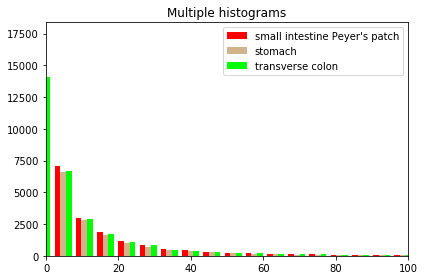

In [42]:
columns = [40,42,51]
sub = np.zeros((data.shape[0], 3))
for i in range(3):
    col = []
    for x in data[:, columns[i]]:
        if x:
            col.append(float(x))
        else:
            col.append(-10.0)
    sub[:,i] = col

num_bins = 10000
colors = ['red', 'tan', 'lime']
labels = [names[columns[i]] for i in range(3)]
fig, ax = plt.subplots()
ax.set_xlim (0,100)
ax.hist(sub, num_bins, histtype='bar', stacked=False, color=colors, label=labels)
ax.set_title('Multiple histograms')
ax.legend(prop={'size': 10})

fig.tight_layout()
plt.show()
